In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
import keras
import gc
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize



files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
#files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    
    #price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    
    price=price.drop(['Unnamed: 0'],axis=1)
   
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    print(file)
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


AAPL
AMZN
PEP
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX
BKNG
ADBE
AMGN
TXN
AVGO
PYPL
GILD
COST
QCOM


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [3]:
def buildModel(l,n,d,le):
    opt=optimizers.Adam(lr=le)
    model = Sequential()  
    model.add(Dense(n, input_dim=111,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

    return model
def reset_weights(model):
    session=K.get_session()
    for layer in model.layers:
        if(hasattr(layer,'kernel_initializer')):
            layer.kernel.initializer.run(session=session)
            
           


Working on... AAPL
15.571701720841297
0.005338458253266777
working on d,u and l,le 0.5 64 0.01 0.001


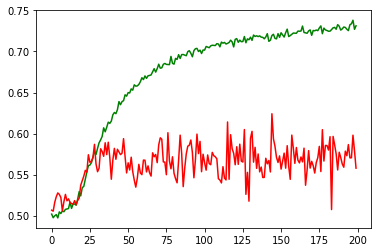

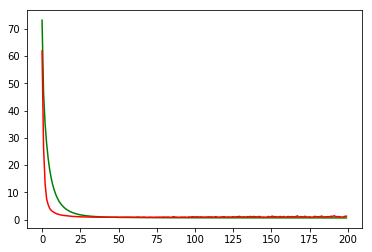

working on d,u and l,le 0.5 64 0.01 0.0001


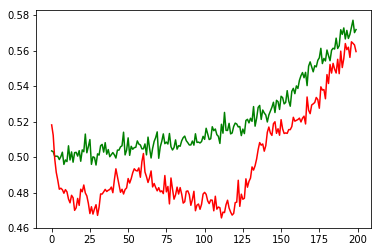

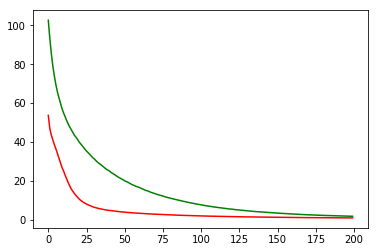

working on d,u and l,le 0.5 128 0.01 0.001


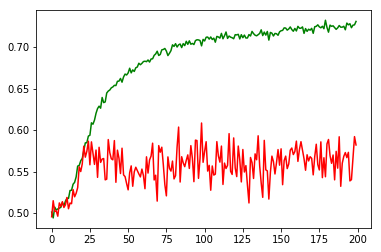

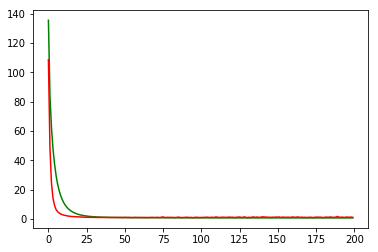

working on d,u and l,le 0.5 128 0.01 0.0001


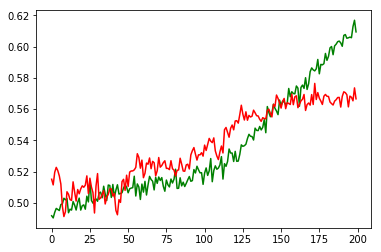

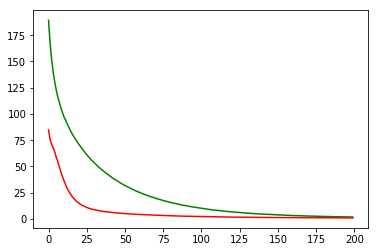

working on d,u and l,le 0.5 256 0.01 0.001


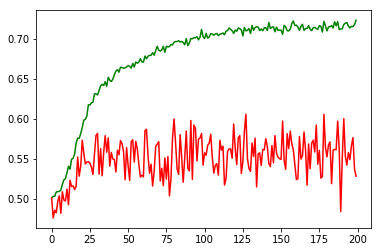

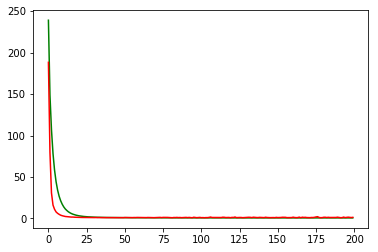

working on d,u and l,le 0.5 256 0.01 0.0001


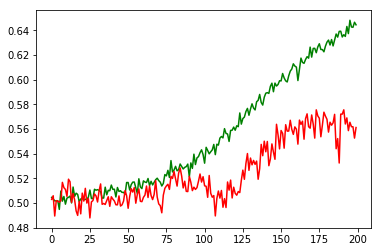

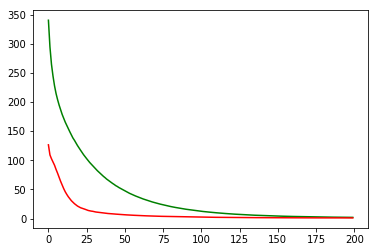

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: AAPL


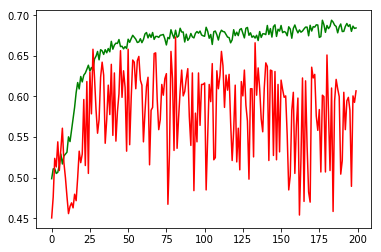

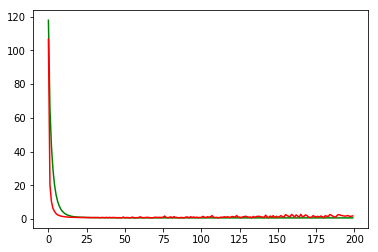

F1,score 0.5061043285238624
G-score: 0.5745788229156953
Accuracy 0.6068904593639576
Window: 140
[[459  49]
 [396 228]]
Vol pos 4.1111693369204225
Vol neg 1.684662931925671
Real Percentage of gain: 86.71578976979605
Percentage of gain: 1.8327723761107833
Total gain: 2074.6983297574066
000000000000000000000000000000000000000000000000
Percentile:  0
[[356  28]
 [345  30]]
759/759 [==============================] - 0s 25us/step
[2.1054271426105844, 0.5085638998682477]
Percentile:  1
[[50 16]
 [48 36]]
150/150 [==============================] - 0s 38us/step
[1.5175738646586736, 0.5733333333333334]
Percentile:  2
[[53  5]
 [ 0 79]]
137/137 [==============================] - 0s 32us/step
[0.28303175838324274, 0.9635036496350365]
Percentile:  3
[[49]]
49/49 [==============================] - 0s 46us/step
[0.2666401759702332, 1.0]
Percentile:  4
[[ 0  0]
 [ 2 33]]
35/35 [==============================] - 0s 55us/step
[0.36060196587017607, 0.9428571428571428]
000000000000000000000000000000000000

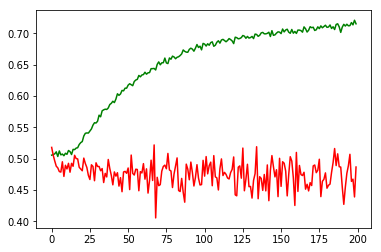

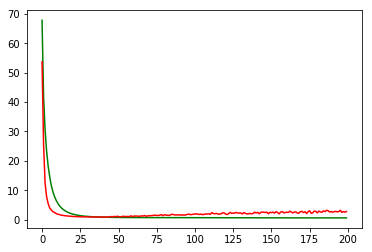

working on d,u and l,le 0.5 64 0.01 0.0001


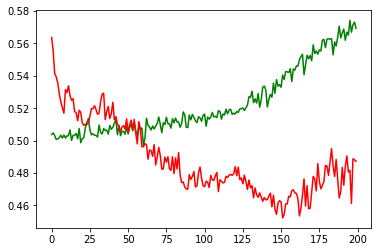

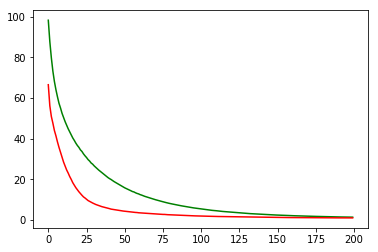

working on d,u and l,le 0.5 128 0.01 0.001


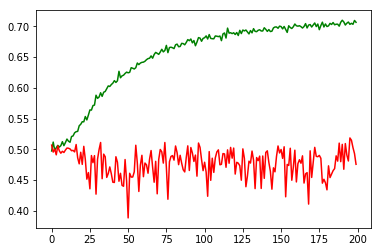

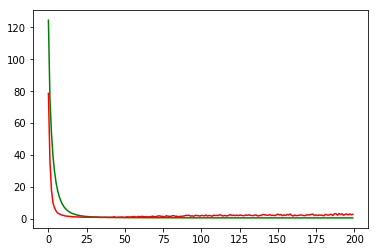

working on d,u and l,le 0.5 128 0.01 0.0001


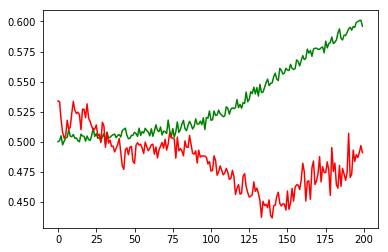

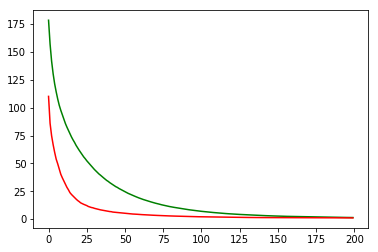

working on d,u and l,le 0.5 256 0.01 0.001


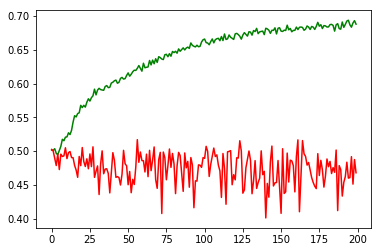

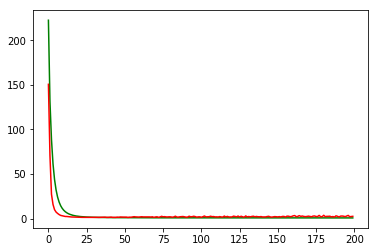

working on d,u and l,le 0.5 256 0.01 0.0001


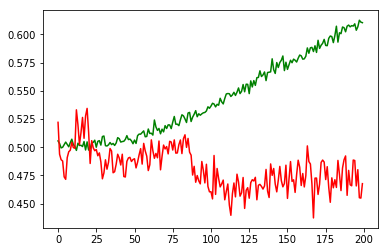

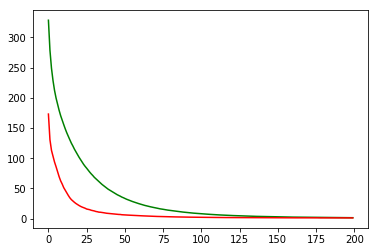

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: AMZN


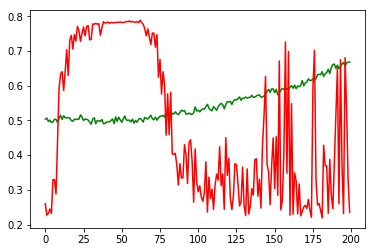

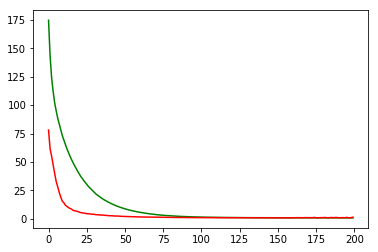

F1,score 0.07280513918629551
G-score: 0.18886811072048398
Accuracy 0.23498233215547704
Window: 140
[[232  19]
 [847  34]]
Vol pos 1.7978948785064535
Vol neg 2.530637167528288
Real Percentage of gain: -229.74784350437196
Percentage of gain: -1.513508612541326
Total gain: -1713.291749396781
000000000000000000000000000000000000000000000000
Percentile:  0
[[192   7]
 [413  19]]
631/631 [==============================] - 0s 29us/step
[1.1740642357174833, 0.33438985736925514]
Percentile:  1
[[ 29   7]
 [340   9]]
385/385 [==============================] - 0s 27us/step
[1.3465289809487082, 0.0987012987012987]
Percentile:  2
[[11  5]
 [58  1]]
75/75 [==============================] - 0s 43us/step
[1.2224890009562175, 0.16]
Percentile:  3
[[ 0  0]
 [33  0]]
33/33 [==============================] - 0s 50us/step
[1.057312593315587, 0.0]
Percentile:  4
[[0 0]
 [2 4]]
6/6 [==============================] - 0s 138us/step
[0.7428171038627625, 0.6666666865348816]
00000000000000000000000000000000000000

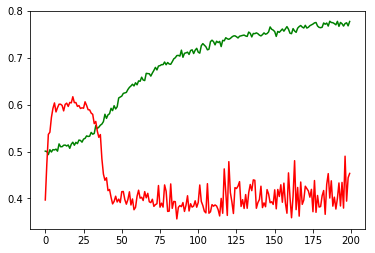

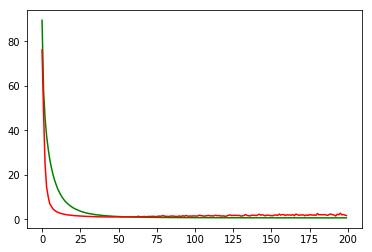

working on d,u and l,le 0.5 64 0.01 0.0001


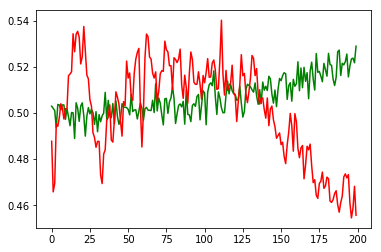

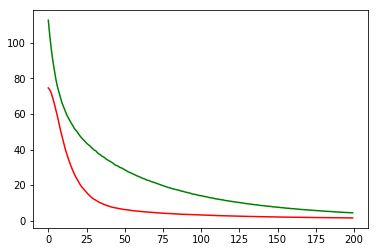

working on d,u and l,le 0.5 128 0.01 0.001


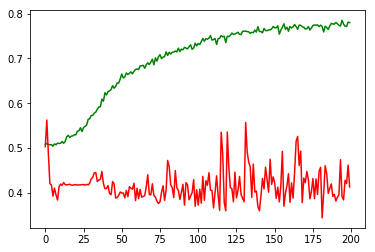

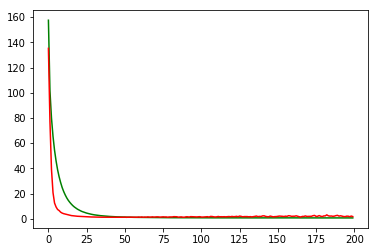

working on d,u and l,le 0.5 128 0.01 0.0001


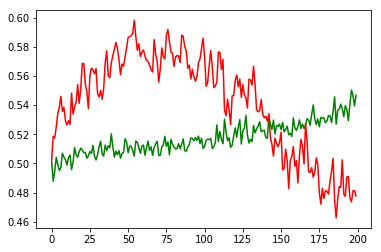

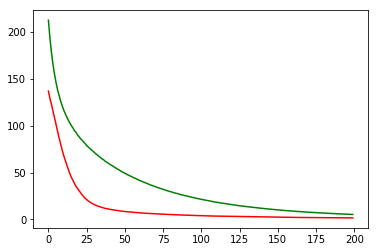

working on d,u and l,le 0.5 256 0.01 0.001


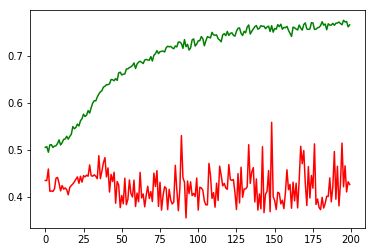

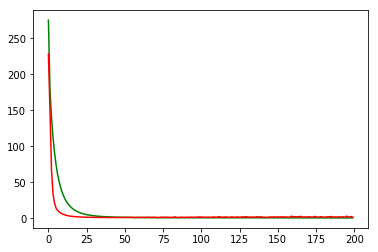

working on d,u and l,le 0.5 256 0.01 0.0001


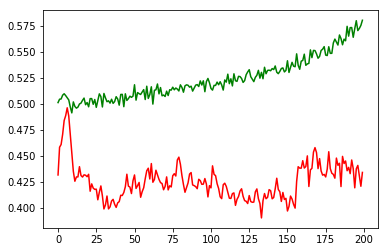

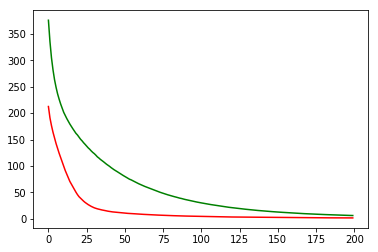

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: PEP


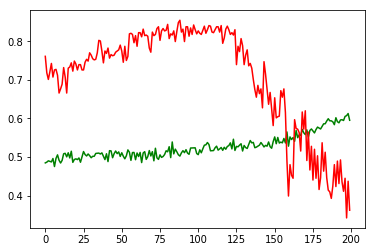

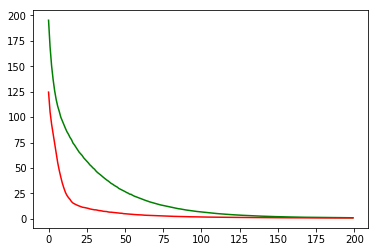

F1,score 0.4889434889434889
G-score: 0.3833347578185145
Accuracy 0.36196319022975815
Window: 140
[[ 37  52]
 [364 199]]
Vol pos 2.2927504030022248
Vol neg 1.9764181975298973
Real Percentage of gain: -22.81904262694239
Percentage of gain: -0.43113631144771813
Total gain: -281.1008750639122
000000000000000000000000000000000000000000000000
Percentile:  0
[[32 38]
 [81 28]]
179/179 [==============================] - 0s 28us/step
[0.8135582584908555, 0.3351955318917109]
Percentile:  1
[[ 5 14]
 [99 47]]
165/165 [==============================] - 0s 38us/step
[0.8192785468968478, 0.3151515152418252]
Percentile:  2
[[  0   0]
 [126  60]]
186/186 [==============================] - 0s 27us/step
[0.8075550384418939, 0.3225806454817454]
Percentile:  3
[[ 0  0]
 [35 41]]
76/76 [==============================] - 0s 36us/step
[0.7357965017619886, 0.5394736842105263]
Percentile:  4
[[ 0  0]
 [22 23]]
45/45 [==============================] - 0s 48us/step
[0.7214139355553522, 0.5111111130979326]
000000

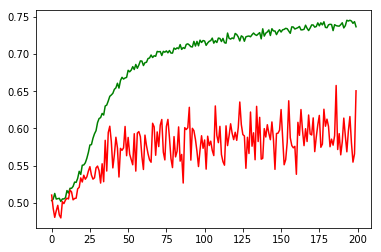

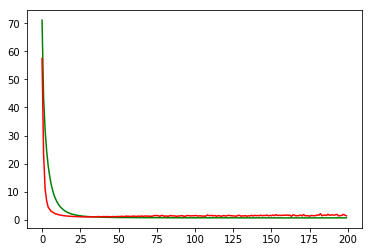

working on d,u and l,le 0.5 64 0.01 0.0001


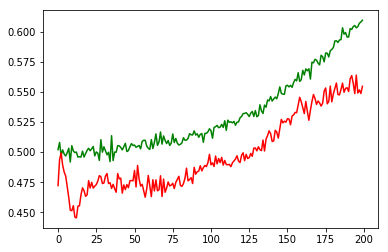

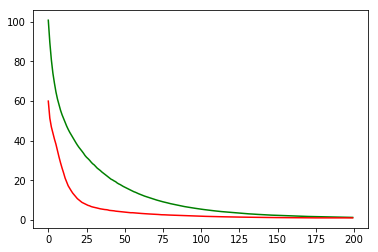

working on d,u and l,le 0.5 128 0.01 0.001


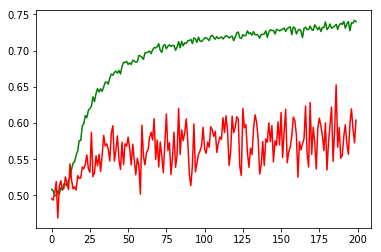

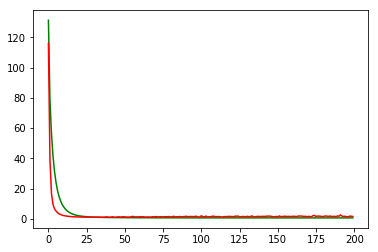

working on d,u and l,le 0.5 128 0.01 0.0001


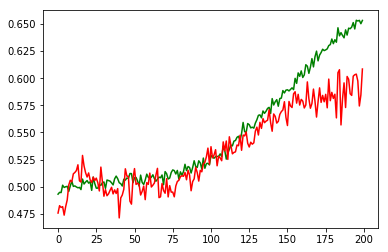

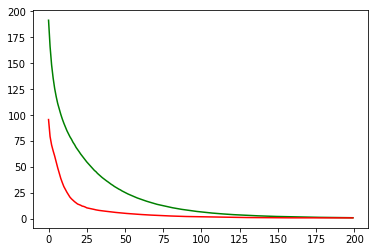

working on d,u and l,le 0.5 256 0.01 0.001


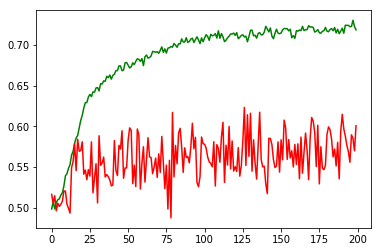

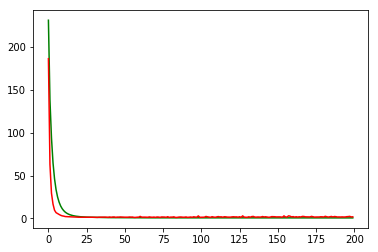

working on d,u and l,le 0.5 256 0.01 0.0001


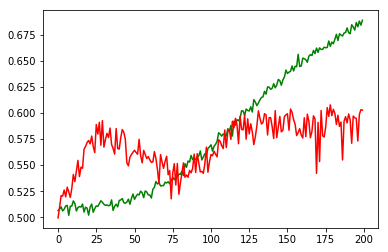

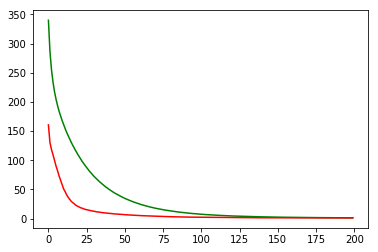

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.001
Chart for BEST MODEL FOR: GOOGL


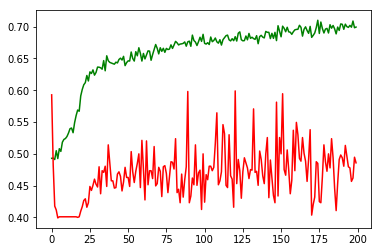

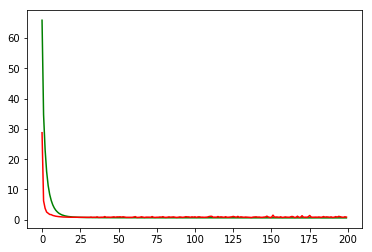

F1,score 0.6062246278755075
G-score: 0.3852976139249317
Accuracy 0.48586572506613107
Window: 140
[[102 352]
 [230 448]]
Vol pos 3.347946230587431
Vol neg 2.5662356675851936
Real Percentage of gain: -2.9504532813925715
Percentage of gain: 0.3072626044951452
Total gain: 347.82126828850437
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 79 152]
 [ 87  98]]
416/416 [==============================] - 0s 25us/step
[0.8804647945440732, 0.4254807692307692]
Percentile:  1
[[ 17  94]
 [ 99 150]]
360/360 [==============================] - 0s 29us/step
[0.8876214543978374, 0.4638888888888889]
Percentile:  2
[[ 5 92]
 [18 91]]
206/206 [==============================] - 0s 31us/step
[0.9431763603849318, 0.46601941790974255]
Percentile:  3
[[ 0 14]
 [19 68]]
101/101 [==============================] - 0s 39us/step
[0.5730463880123479, 0.6732673267326733]
Percentile:  4
[[ 0  0]
 [ 7 40]]
47/47 [==============================] - 0s 48us/step
[0.31961214542388916, 0.8510638348599697]


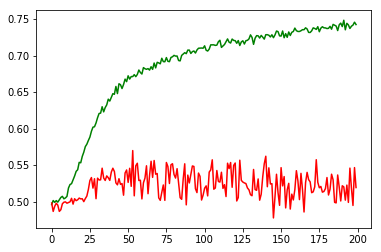

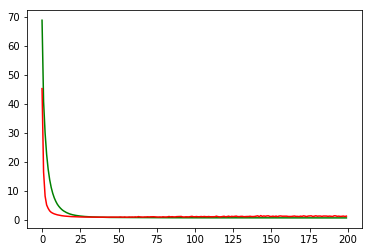

working on d,u and l,le 0.5 64 0.01 0.0001


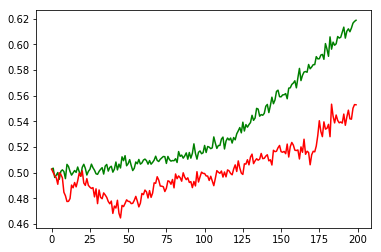

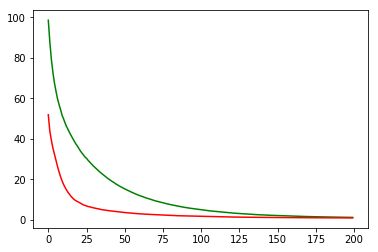

working on d,u and l,le 0.5 128 0.01 0.001


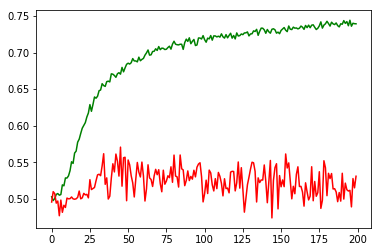

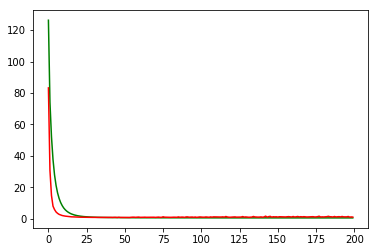

working on d,u and l,le 0.5 128 0.01 0.0001


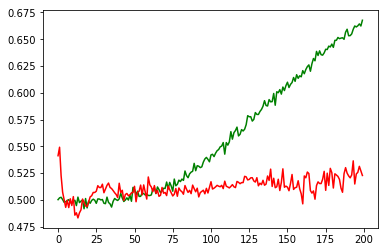

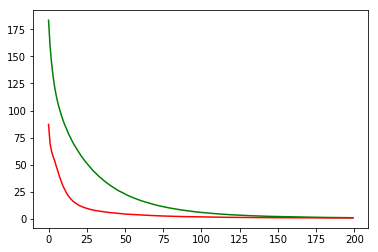

working on d,u and l,le 0.5 256 0.01 0.001


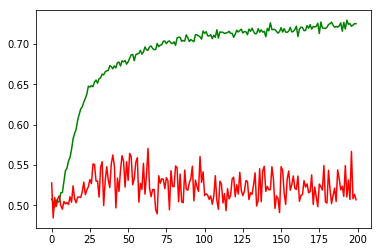

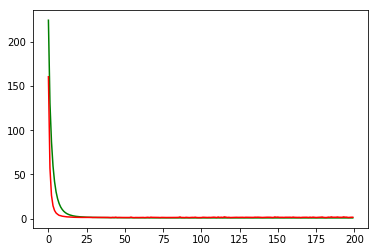

working on d,u and l,le 0.5 256 0.01 0.0001


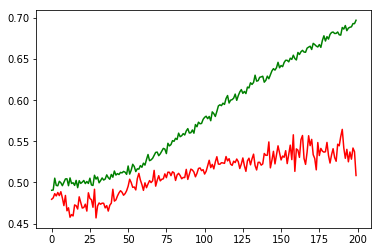

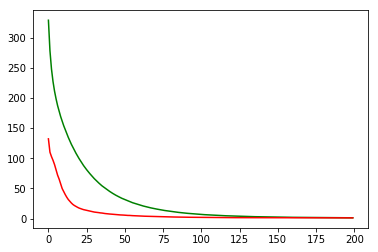

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: MSFT


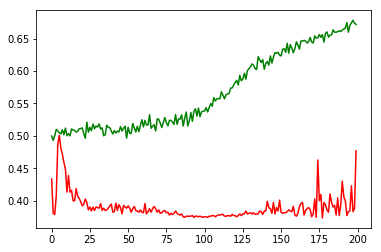

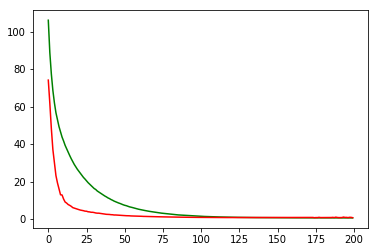

F1,score 0.408
G-score: 0.4771734004879571
Accuracy 0.4770317993821188
Window: 140
[[336  91]
 [501 204]]
Vol pos 1.4622760441753042
Vol neg 1.6628054200507645
Real Percentage of gain: -8.569631112382048
Percentage of gain: -0.1720421773987529
Total gain: -194.7517448153883
000000000000000000000000000000000000000000000000
Percentile:  0
[[244  56]
 [195  54]]
549/549 [==============================] - 0s 26us/step
[0.7299405773915011, 0.5428051001821493]
Percentile:  1
[[ 51  23]
 [163  73]]
310/310 [==============================] - 0s 28us/step
[0.7711173849721109, 0.40000000115363826]
Percentile:  2
[[20  3]
 [90 50]]
163/163 [==============================] - 0s 34us/step
[0.7915015875196164, 0.4294478529435725]
Percentile:  3
[[13  7]
 [43 18]]
81/81 [==============================] - 0s 36us/step
[0.7902057509363434, 0.3827160494287073]
Percentile:  4
[[ 8  2]
 [10  8]]
28/28 [==============================] - 0s 32us/step
[0.6715721487998962, 0.5714285969734192]
0000000000000000

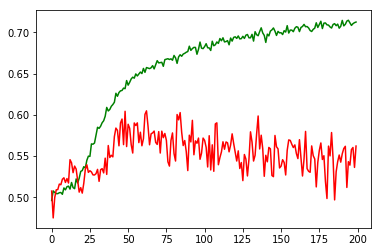

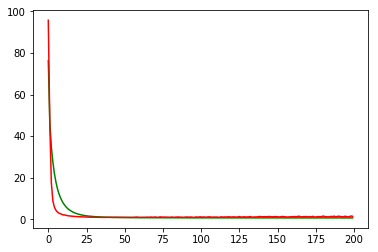

working on d,u and l,le 0.5 64 0.01 0.0001


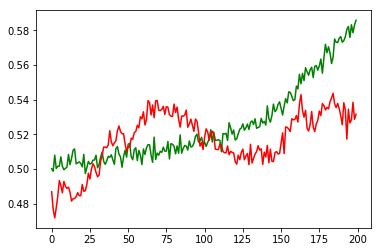

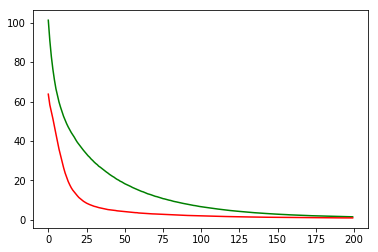

working on d,u and l,le 0.5 128 0.01 0.001


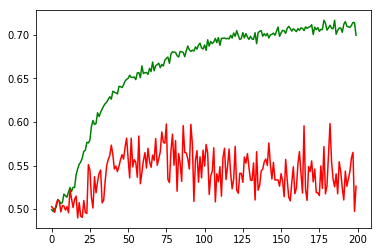

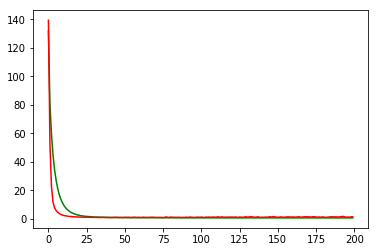

working on d,u and l,le 0.5 128 0.01 0.0001


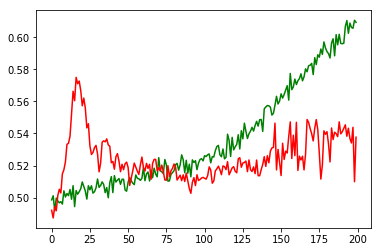

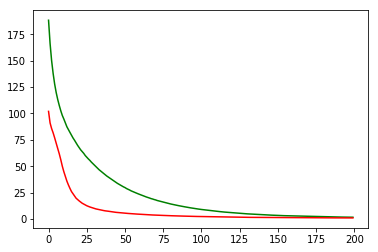

working on d,u and l,le 0.5 256 0.01 0.001


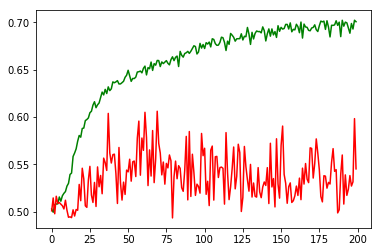

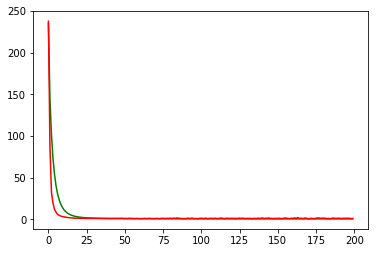

working on d,u and l,le 0.5 256 0.01 0.0001


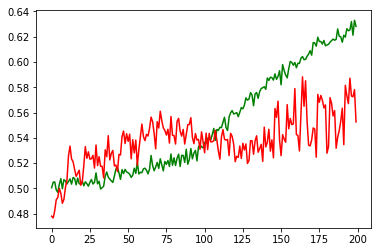

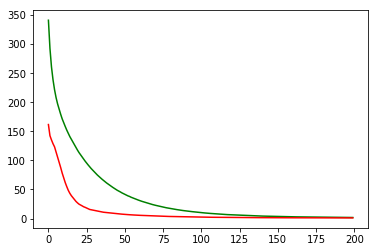

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.001
Chart for BEST MODEL FOR: FB


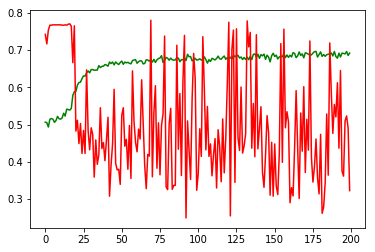

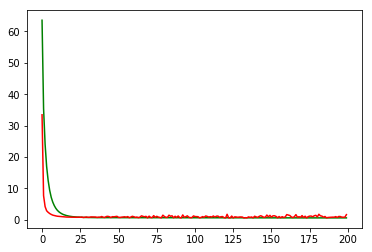

F1,score 0.2811621368322399
G-score: 0.375644554075144
Accuracy 0.3224381625441696
Window: 140
[[215  48]
 [719 150]]
Vol pos 2.9326376556862974
Vol neg 3.149676570949235
Real Percentage of gain: -174.88721594266903
Percentage of gain: -1.188506347696612
Total gain: -1345.3891855925647
000000000000000000000000000000000000000000000000
Percentile:  0
[[204   8]
 [275  35]]
522/522 [==============================] - 0s 34us/step
[1.4710801307725723, 0.4578544061302682]
Percentile:  1
[[  5  32]
 [379  52]]
468/468 [==============================] - 0s 32us/step
[1.9766794025388539, 0.12179487179487179]
Percentile:  2
[[ 5  8]
 [65 27]]
105/105 [==============================] - 0s 46us/step
[1.029092940830049, 0.3047619047619048]
Percentile:  3
[[14]]
14/14 [==============================] - 0s 63us/step
[0.29316461086273193, 1.0]
Percentile:  4
[[21]]
21/21 [==============================] - 0s 55us/step
[0.27811160683631897, 1.0]
000000000000000000000000000000000000000000000000
Working 

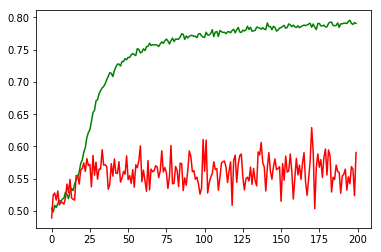

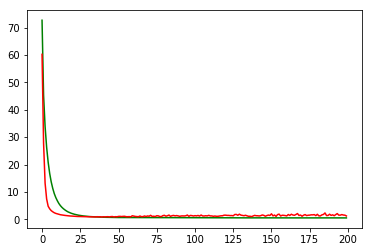

working on d,u and l,le 0.5 64 0.01 0.0001


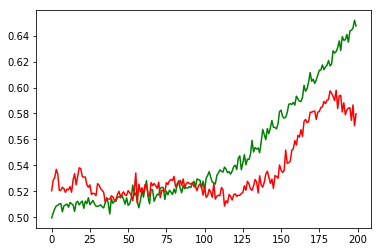

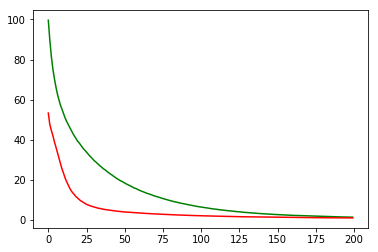

working on d,u and l,le 0.5 128 0.01 0.001


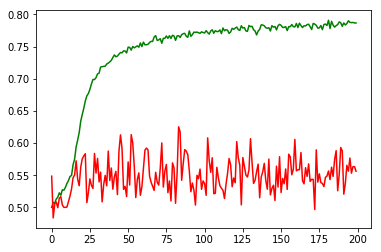

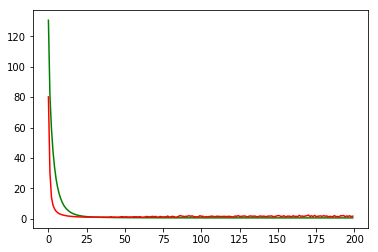

working on d,u and l,le 0.5 128 0.01 0.0001


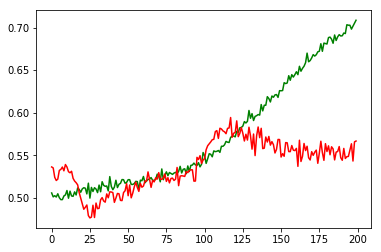

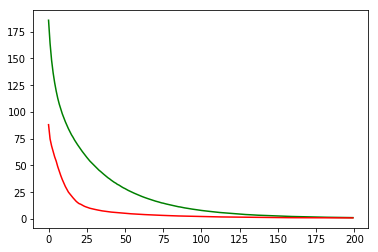

working on d,u and l,le 0.5 256 0.01 0.001


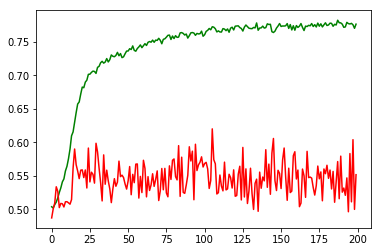

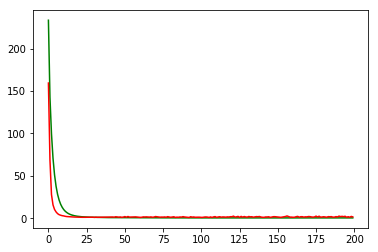

working on d,u and l,le 0.5 256 0.01 0.0001


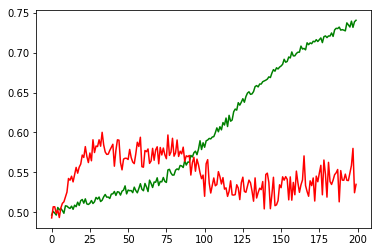

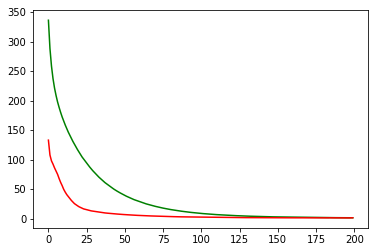

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.001
Chart for BEST MODEL FOR: INTC


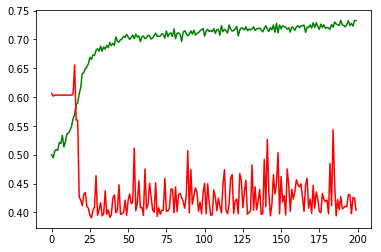

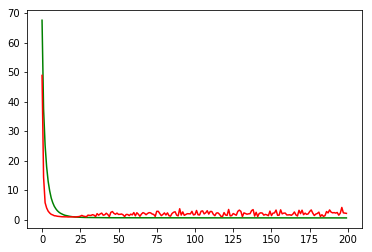

F1,score 0.03982930298719773
G-score: 0.14221072765789503
Accuracy 0.4037102473498233
Window: 140
[[443   6]
 [669  14]]
Vol pos 2.645062648123827
Vol neg 2.1238950764409514
Real Percentage of gain: -100.17230696571491
Percentage of gain: -0.19861797385605412
Total gain: -224.83554640505326
000000000000000000000000000000000000000000000000
Percentile:  0
[[110   6]
 [233   5]]
354/354 [==============================] - 0s 28us/step
[2.4541516479125804, 0.3248587570621469]
Percentile:  1
[[114   0]
 [221   6]]
341/341 [==============================] - 0s 28us/step
[2.2300890889401135, 0.3519061583577713]
Percentile:  2
[[127   0]
 [148   3]]
278/278 [==============================] - 0s 29us/step
[1.6683790762808255, 0.4676258992805755]
Percentile:  3
[[63  0]
 [51  0]]
114/114 [==============================] - 0s 38us/step
[1.2855170888074658, 0.5526315789473685]
Percentile:  4
[[29  0]
 [14  0]]
43/43 [==============================] - 0s 63us/step
[0.7111865807064744, 0.674418604651

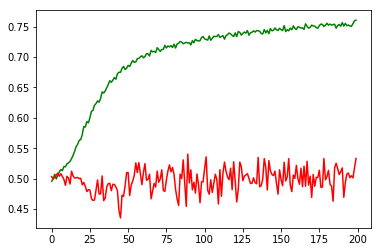

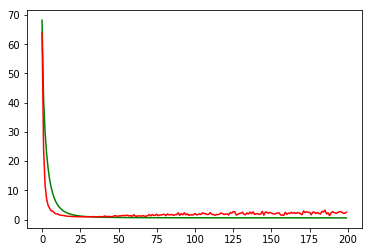

working on d,u and l,le 0.5 64 0.01 0.0001


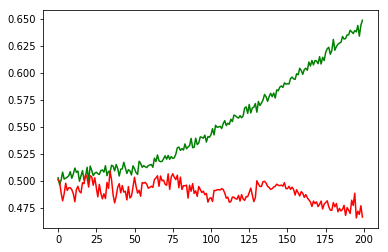

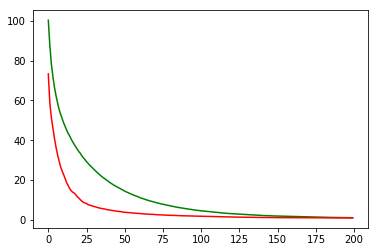

working on d,u and l,le 0.5 128 0.01 0.001


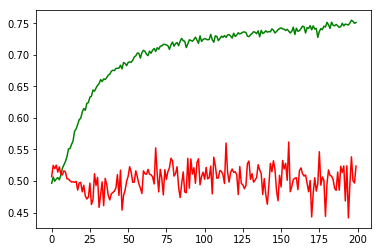

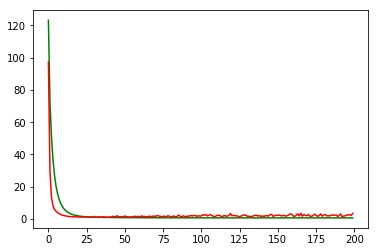

working on d,u and l,le 0.5 128 0.01 0.0001


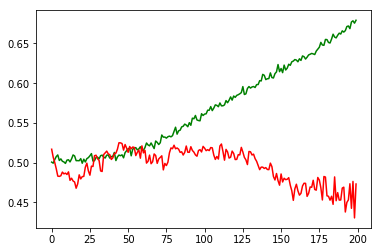

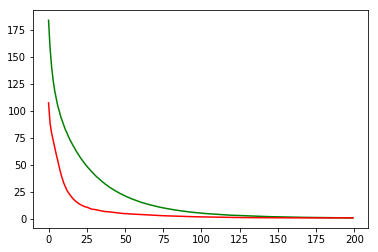

working on d,u and l,le 0.5 256 0.01 0.001


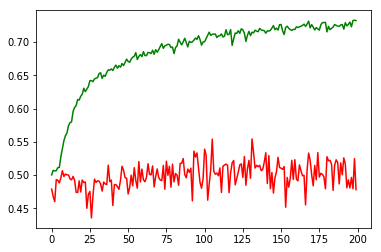

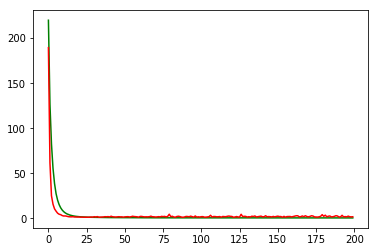

working on d,u and l,le 0.5 256 0.01 0.0001


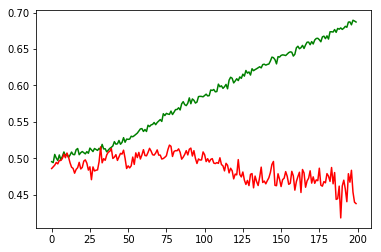

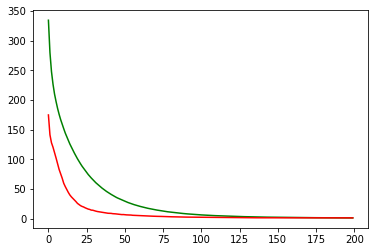

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.001
Chart for BEST MODEL FOR: CSCO


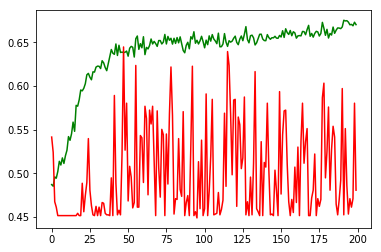

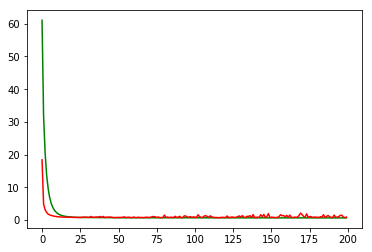

F1,score 0.12759643916913946
G-score: 0.26055345750777076
Accuracy 0.4805653701822665
Window: 140
[[501  10]
 [578  43]]
Vol pos 2.1195823972310057
Vol neg 1.5892588636771827
Real Percentage of gain: 65.52451904941528
Percentage of gain: 0.19308181294300683
Total gain: 218.56861225148373
000000000000000000000000000000000000000000000000
Percentile:  0
[[226   5]
 [265  25]]
521/521 [==============================] - 0s 28us/step
[0.9371324466709441, 0.4817658349328215]
Percentile:  1
[[102   3]
 [203  10]]
318/318 [==============================] - 0s 24us/step
[0.934284083498349, 0.3522012582365072]
Percentile:  2
[[63  1]
 [76  5]]
145/145 [==============================] - 0s 40us/step
[0.7209508501250168, 0.46896551847457885]
Percentile:  3
[[57  1]
 [26  2]]
86/86 [==============================] - 0s 37us/step
[0.4986689437267392, 0.6860465074694434]
Percentile:  4
[[52  0]
 [ 5  1]]
58/58 [==============================] - 0s 34us/step
[0.17635878175497055, 0.9137931034482759]
00

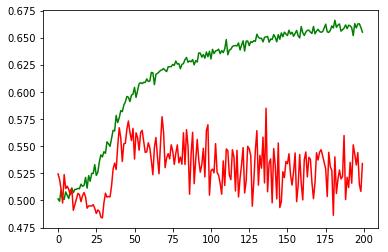

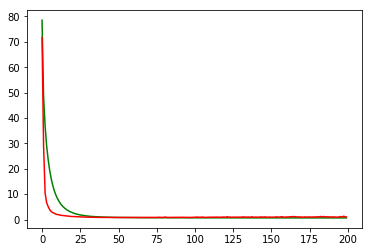

working on d,u and l,le 0.5 64 0.01 0.0001


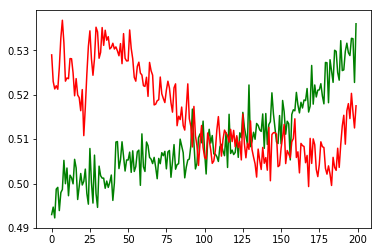

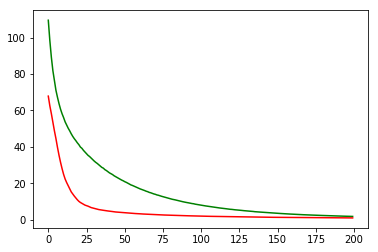

working on d,u and l,le 0.5 128 0.01 0.001


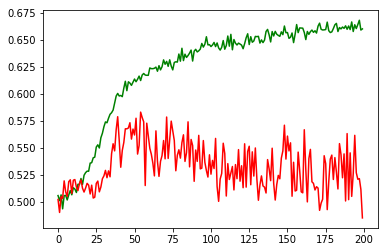

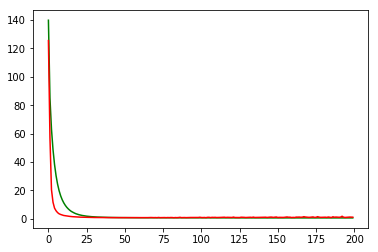

working on d,u and l,le 0.5 128 0.01 0.0001


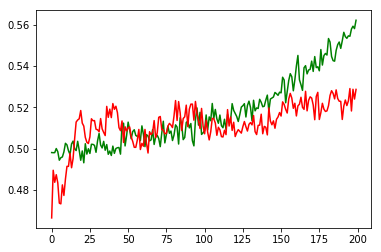

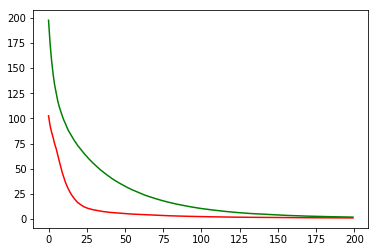

working on d,u and l,le 0.5 256 0.01 0.001


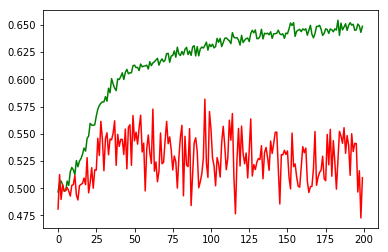

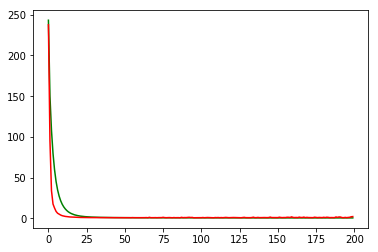

working on d,u and l,le 0.5 256 0.01 0.0001


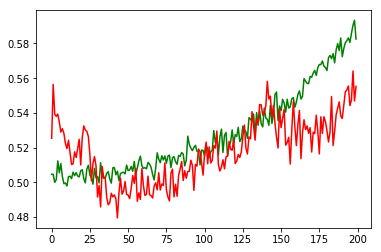

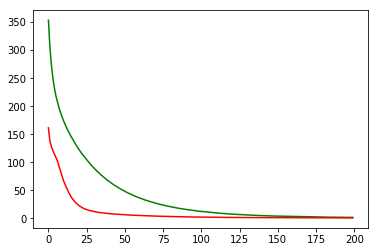

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.0001
Chart for BEST MODEL FOR: CMCSA


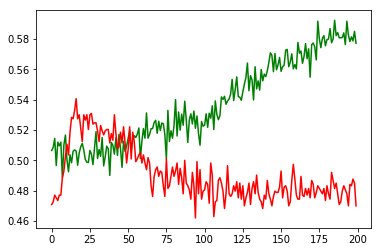

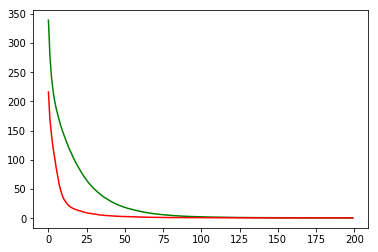

F1,score 0.5708154506437768
G-score: 0.4073989406061378
Accuracy 0.4699646662065081
Window: 140
[[133 408]
 [192 399]]
Vol pos 2.9346262290303446
Vol neg 2.7909361109251734
Real Percentage of gain: 73.76072678460132
Percentage of gain: -0.10012412783653767
Total gain: -113.34051271096064
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56 171]
 [ 83 117]]
427/427 [==============================] - 0s 50us/step
[0.8705237847022206, 0.405152224824356]
Percentile:  1
[[ 55 143]
 [ 99 205]]
502/502 [==============================] - 0s 51us/step
[0.8670328577676142, 0.5179282870900583]
Percentile:  2
[[ 7 35]
 [ 9 65]]
116/116 [==============================] - 0s 55us/step
[0.6543565433600853, 0.6206896551724138]
Percentile:  3
[[14 46]
 [ 0 12]]
72/72 [==============================] - 0s 75us/step
[0.8048787249459161, 0.3611111111111111]
Percentile:  4
[[ 1 12]
 [ 0  0]]
13/13 [==============================] - 0s 85us/step
[0.9601479172706604, 0.07692307978868484]
000

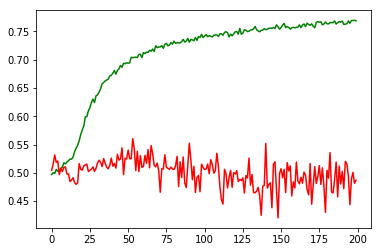

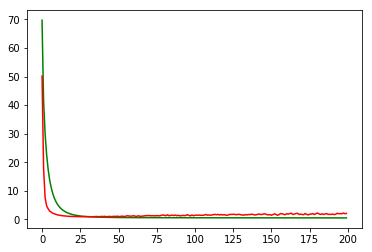

working on d,u and l,le 0.5 64 0.01 0.0001


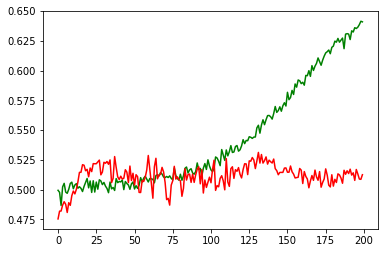

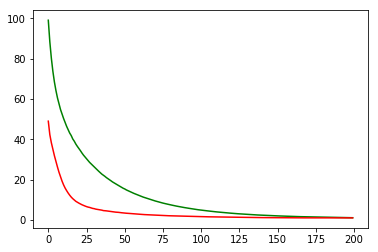

working on d,u and l,le 0.5 128 0.01 0.001


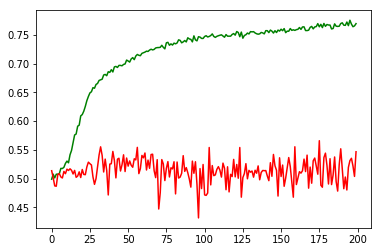

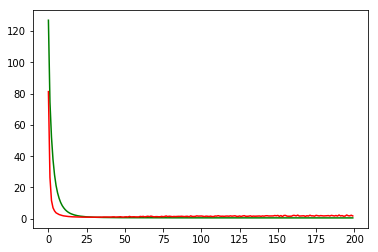

working on d,u and l,le 0.5 128 0.01 0.0001


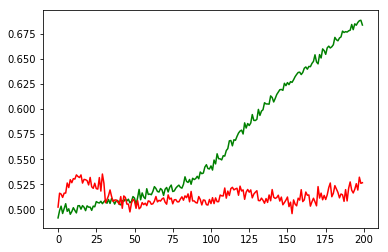

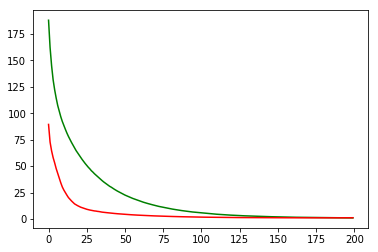

working on d,u and l,le 0.5 256 0.01 0.001


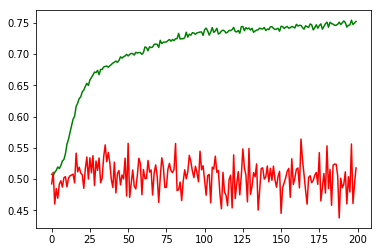

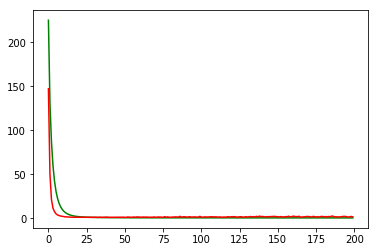

working on d,u and l,le 0.5 256 0.01 0.0001


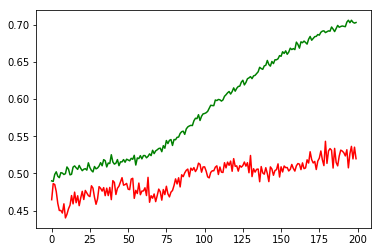

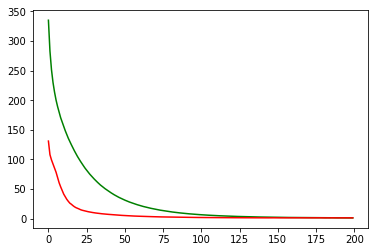

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: NVDA


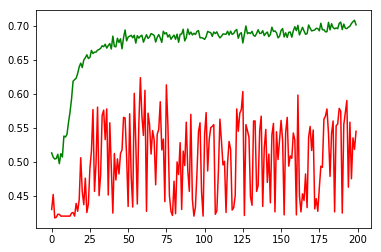

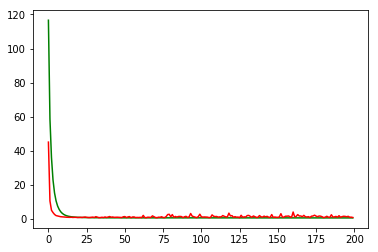

F1,score 0.5200372786579683
G-score: 0.5495472712336514
Accuracy 0.5450530022698662
Window: 140
[[338 138]
 [377 279]]
Vol pos 4.383230764629109
Vol neg 3.0394010999544707
Real Percentage of gain: 66.8245127760935
Percentage of gain: 1.0063266919607845
Total gain: 1139.161815299608
000000000000000000000000000000000000000000000000
Percentile:  0
[[227  85]
 [200  46]]
558/558 [==============================] - 0s 34us/step
[1.025922001422947, 0.48924731118704684]
Percentile:  1
[[101  17]
 [130  90]]
338/338 [==============================] - 0s 44us/step
[0.6307159780397923, 0.5650887573964497]
Percentile:  2
[[ 8 23]
 [44 28]]
103/103 [==============================] - 0s 69us/step
[0.8915454195541086, 0.34951456310679613]
Percentile:  3
[[ 2 13]
 [ 1 64]]
80/80 [==============================] - 0s 58us/step
[0.5688918232917786, 0.825]
Percentile:  4
[[ 0  0]
 [ 1 50]]
51/51 [==============================] - 0s 55us/step
[0.47968193888664246, 0.9803921568627451]
00000000000000000000

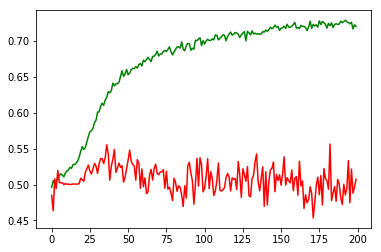

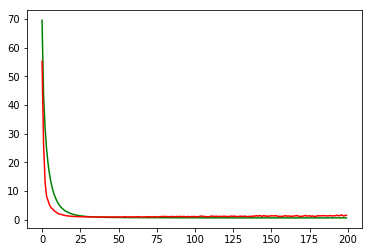

working on d,u and l,le 0.5 64 0.01 0.0001


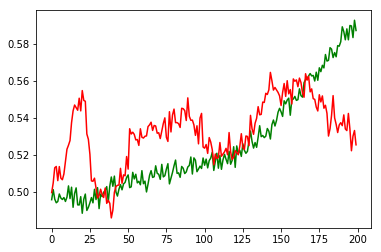

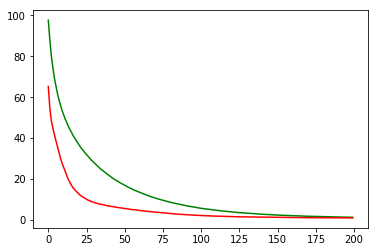

working on d,u and l,le 0.5 128 0.01 0.001


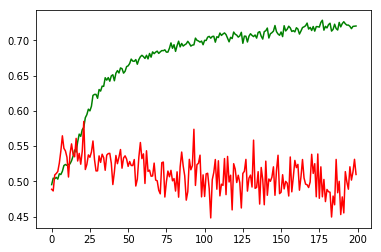

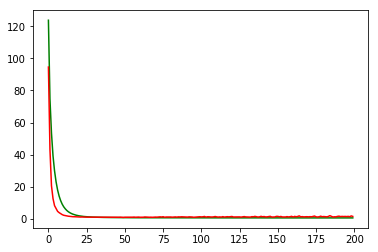

working on d,u and l,le 0.5 128 0.01 0.0001


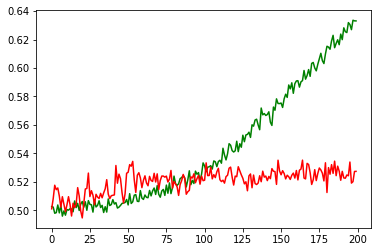

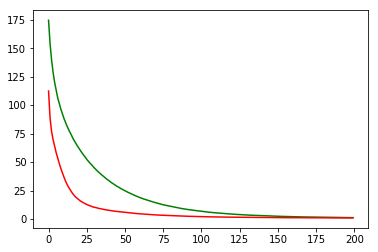

working on d,u and l,le 0.5 256 0.01 0.001


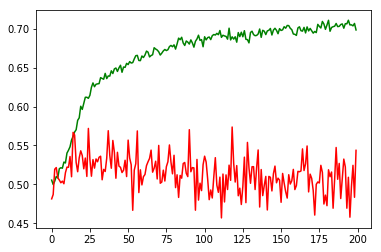

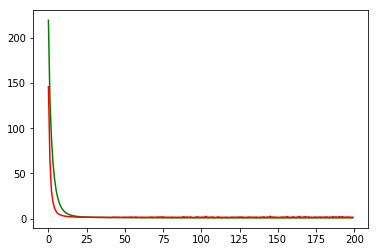

working on d,u and l,le 0.5 256 0.01 0.0001


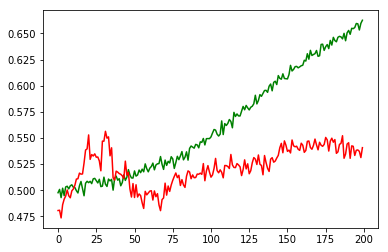

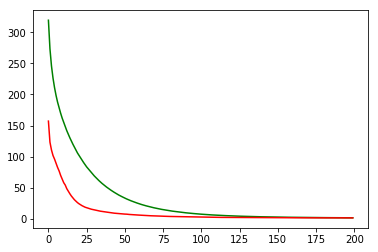

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.001
Chart for BEST MODEL FOR: NFLX


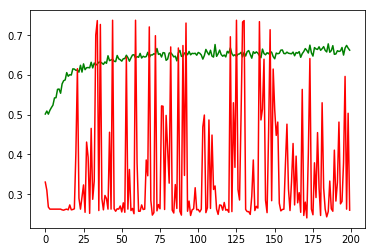

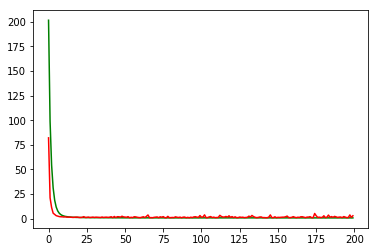

F1,score 0.004750593824228028
G-score: 0.04852716957768622
Accuracy 0.2597173144876325
Window: 140
[[292   5]
 [833   2]]
Vol pos 3.319049242739445
Vol neg 4.69617436263966
Real Percentage of gain: -387.10519229518206
Percentage of gain: -2.6144820128327186
Total gain: -2959.5936385266377
000000000000000000000000000000000000000000000000
Percentile:  0
[[166   4]
 [288   2]]
460/460 [==============================] - 0s 44us/step
[2.1498275072678275, 0.3652173913691355]
Percentile:  1
[[ 60   0]
 [268   0]]
328/328 [==============================] - 0s 44us/step
[2.627310559517, 0.18292682926829268]
Percentile:  2
[[ 37   1]
 [195   0]]
233/233 [==============================] - 0s 42us/step
[3.2585607414081883, 0.15879828326180256]
Percentile:  3
[[27  0]
 [70  0]]
97/97 [==============================] - 0s 49us/step
[3.3690366671257412, 0.27835051546391754]
Percentile:  4
[[ 1  0]
 [11  0]]
12/12 [==============================] - 0s 88us/step
[4.251352310180664, 0.0833333358168602]


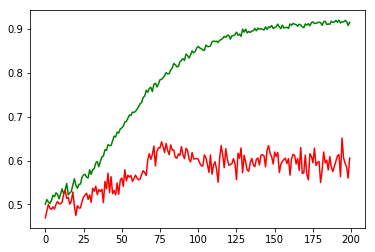

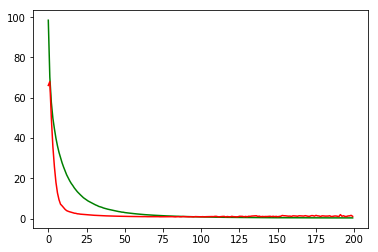

working on d,u and l,le 0.5 64 0.01 0.0001


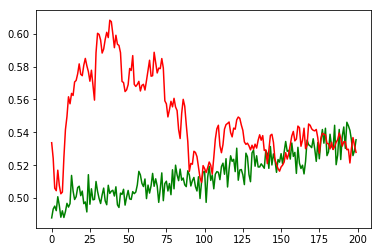

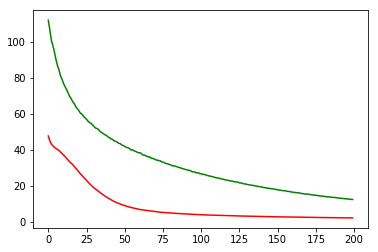

working on d,u and l,le 0.5 128 0.01 0.001


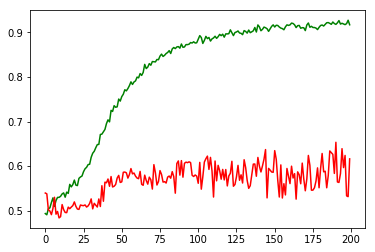

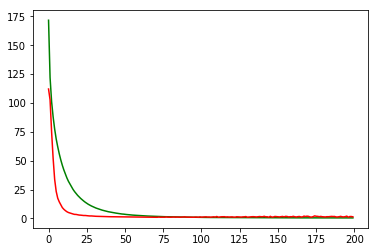

working on d,u and l,le 0.5 128 0.01 0.0001


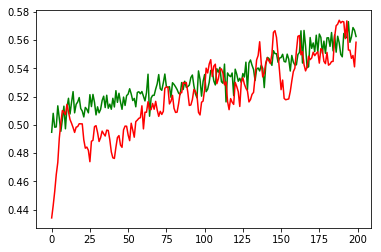

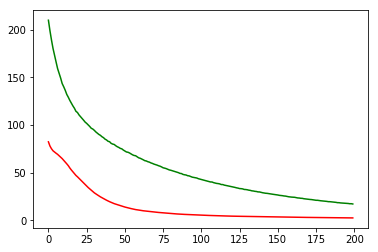

working on d,u and l,le 0.5 256 0.01 0.001


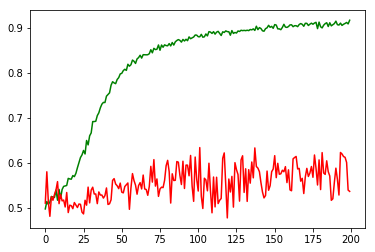

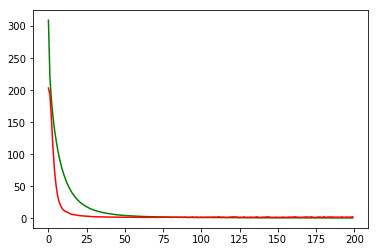

working on d,u and l,le 0.5 256 0.01 0.0001


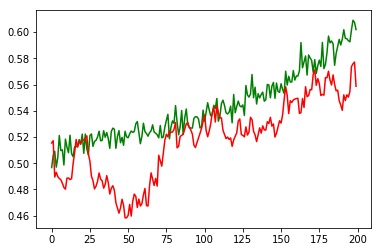

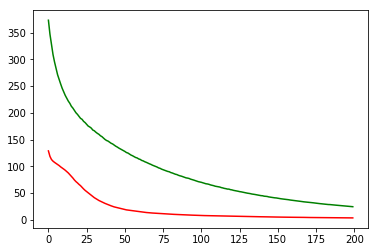

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: BKNG


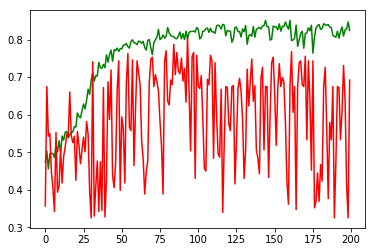

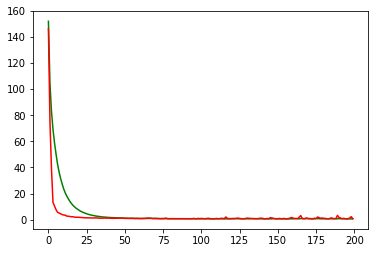

F1,score 0.7375
G-score: 0.7149228933110127
Accuracy 0.6919315401965657
Window: 140
[[106  27]
 [ 99 177]]
Vol pos 1.255438018314679
Vol neg 0.7471585821575932
Real Percentage of gain: 190.06749958920966
Percentage of gain: 0.6385011682914362
Total gain: 261.14697783119743
000000000000000000000000000000000000000000000000
Percentile:  0
[[79 20]
 [57 40]]
196/196 [==============================] - 0s 42us/step
[0.703956629548754, 0.6071428571428571]
Percentile:  1
[[22  4]
 [28 44]]
98/98 [==============================] - 0s 54us/step
[0.6195295051652558, 0.673469387755102]
Percentile:  2
[[ 5  2]
 [14 61]]
82/82 [==============================] - 0s 58us/step
[0.39298699832544093, 0.8048780491439308]
Percentile:  3
[[19]]
19/19 [==============================] - 0s 89us/step
[0.16876521706581116, 1.0]
Percentile:  4
[[12]]
12/12 [==============================] - 0s 169us/step
[0.10500531643629074, 1.0]
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880

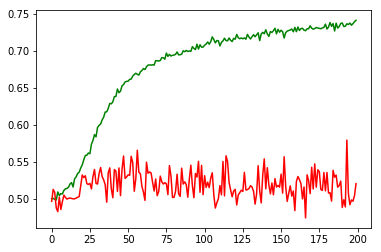

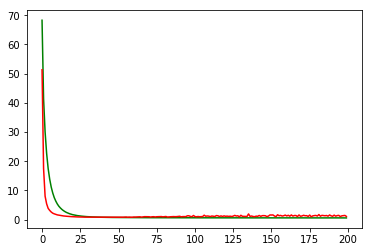

working on d,u and l,le 0.5 64 0.01 0.0001


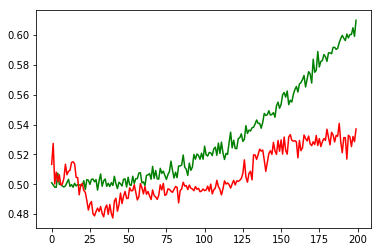

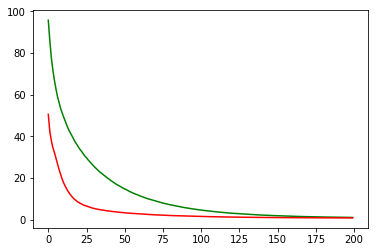

working on d,u and l,le 0.5 128 0.01 0.001


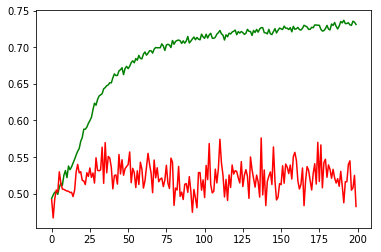

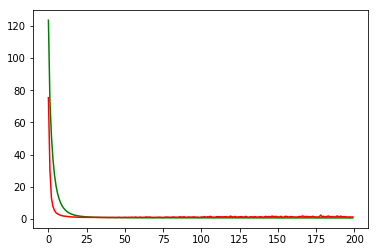

working on d,u and l,le 0.5 128 0.01 0.0001


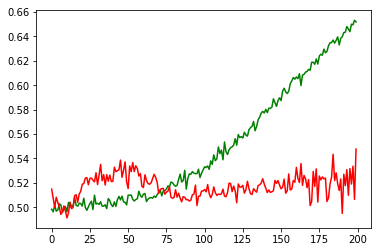

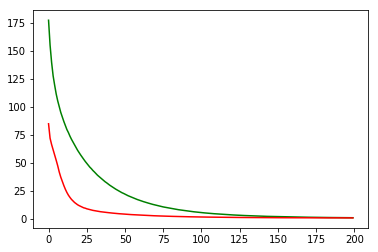

working on d,u and l,le 0.5 256 0.01 0.001


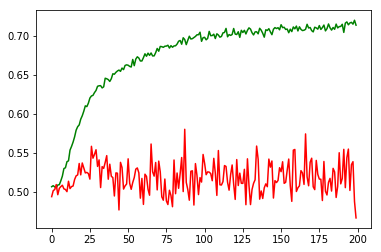

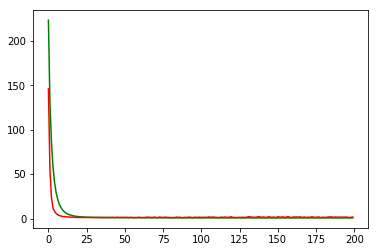

working on d,u and l,le 0.5 256 0.01 0.0001


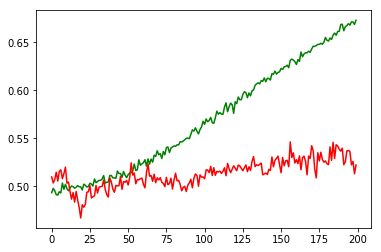

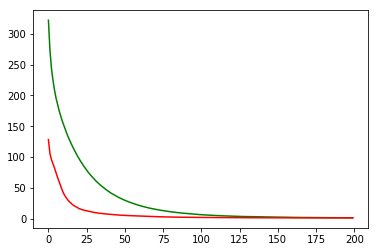

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: ADBE


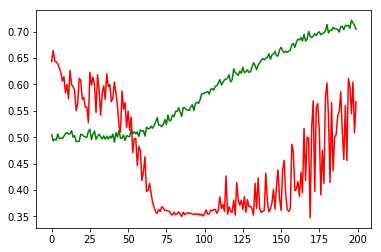

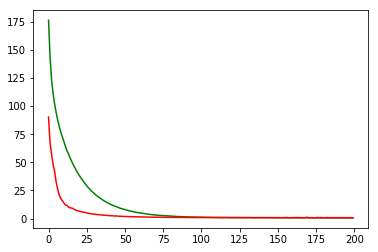

F1,score 0.6750663129973474
G-score: 0.482798839222817
Accuracy 0.5671378083448106
Window: 140
[[133 260]
 [230 509]]
Vol pos 2.725886736261592
Vol neg 2.524292694333867
Real Percentage of gain: 134.37503825922954
Percentage of gain: 0.4532825657741584
Total gain: 513.1158644563473
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 83 184]
 [ 72 210]]
549/549 [==============================] - 0s 41us/step
[0.7419209069893008, 0.5336976320582878]
Percentile:  1
[[ 31  47]
 [ 96 165]]
339/339 [==============================] - 0s 41us/step
[0.7197375374909347, 0.5781710914674059]
Percentile:  2
[[10 15]
 [37 96]]
158/158 [==============================] - 0s 43us/step
[0.642922891846186, 0.6708860789673238]
Percentile:  3
[[ 9 14]
 [11 32]]
66/66 [==============================] - 0s 70us/step
[0.6559060486880216, 0.6212121212121212]
Percentile:  4
[[ 0  0]
 [14  4]]
18/18 [==============================] - 0s 60us/step
[0.9420474767684937, 0.2222222238779068]
0000000000

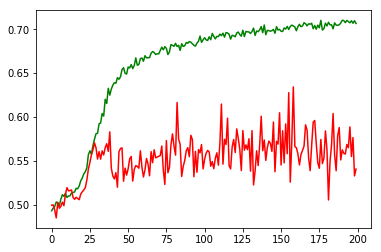

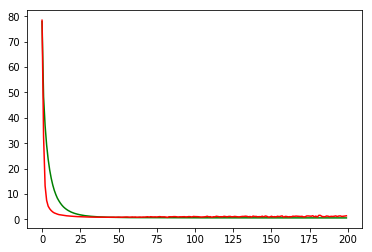

working on d,u and l,le 0.5 64 0.01 0.0001


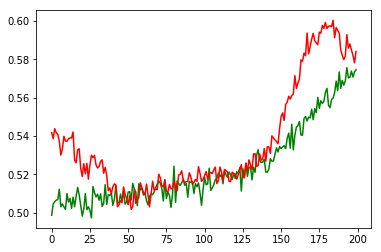

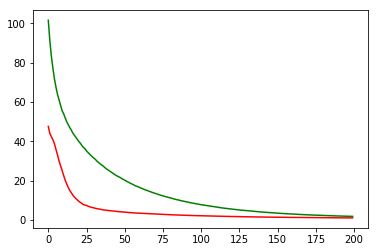

working on d,u and l,le 0.5 128 0.01 0.001


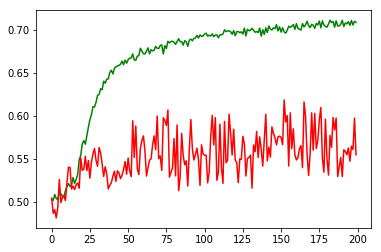

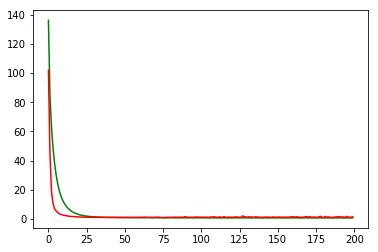

working on d,u and l,le 0.5 128 0.01 0.0001


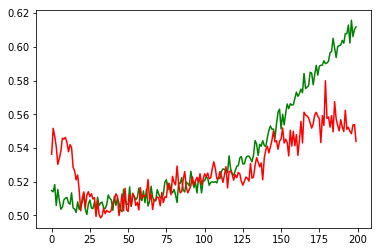

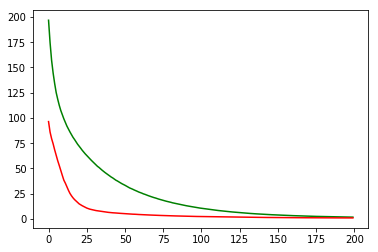

working on d,u and l,le 0.5 256 0.01 0.001


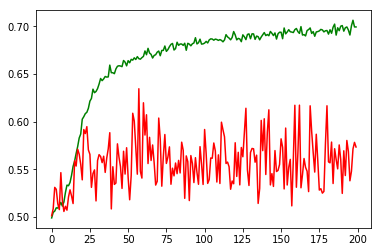

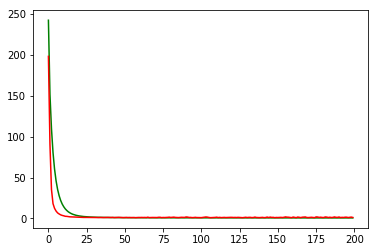

working on d,u and l,le 0.5 256 0.01 0.0001


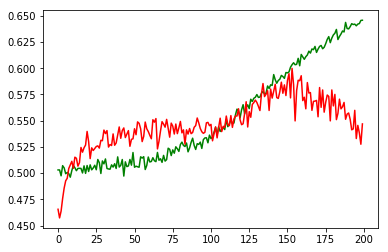

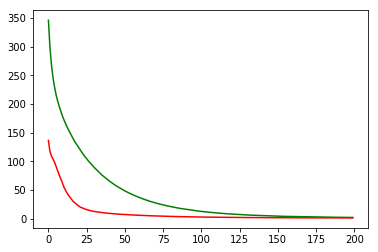

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: AMGN


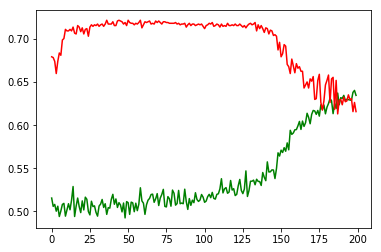

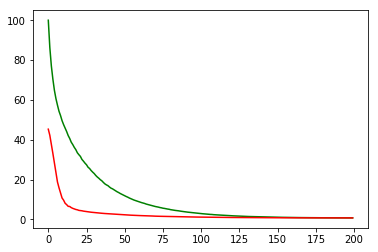

F1,score 0.7469458987783596
G-score: 0.36933723735978874
Accuracy 0.6157243825732187
Window: 140
[[ 55 263]
 [172 642]]
Vol pos 1.9638253512109443
Vol neg 1.7916939065364967
Real Percentage of gain: 136.4877273488568
Percentage of gain: 0.5206708661224841
Total gain: 589.3994204506521
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 55 108]
 [116 193]]
472/472 [==============================] - 0s 38us/step
[0.7078705783617698, 0.5254237288135594]
Percentile:  1
[[  0  55]
 [ 40 205]]
300/300 [==============================] - 0s 44us/step
[0.6529025491078695, 0.6833333333333333]
Percentile:  2
[[  0  26]
 [ 14 173]]
213/213 [==============================] - 0s 61us/step
[0.6206881753715551, 0.8122065738892891]
Percentile:  3
[[ 0 56]
 [ 2 67]]
125/125 [==============================] - 0s 54us/step
[0.686635615825653, 0.5360000052452087]
Percentile:  4
[[ 0 17]
 [ 0  3]]
20/20 [==============================] - 0s 57us/step
[0.814499020576477, 0.15000000596046448]
0

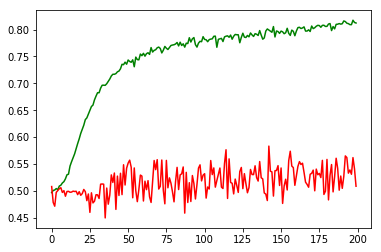

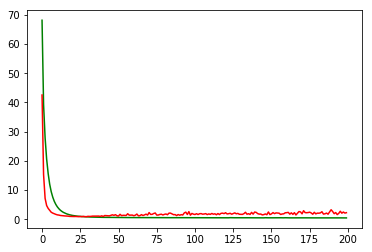

working on d,u and l,le 0.5 64 0.01 0.0001


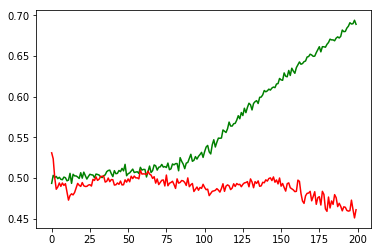

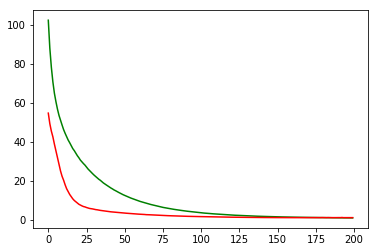

working on d,u and l,le 0.5 128 0.01 0.001


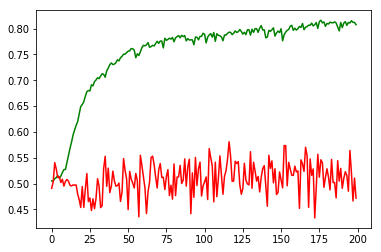

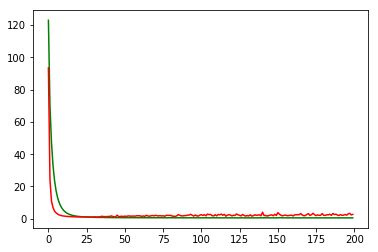

working on d,u and l,le 0.5 128 0.01 0.0001


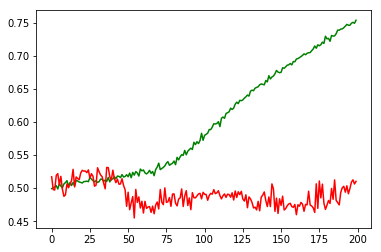

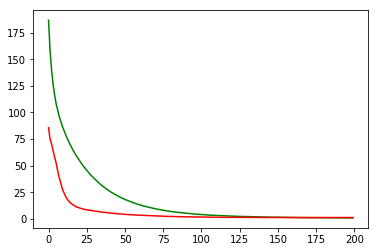

working on d,u and l,le 0.5 256 0.01 0.001


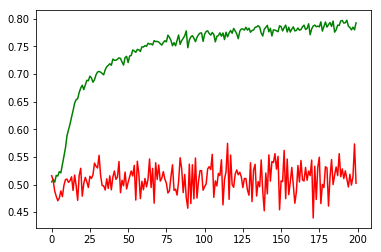

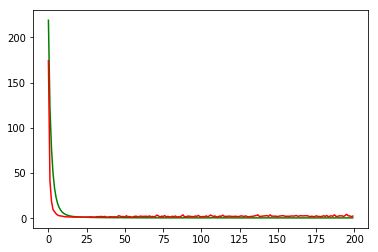

working on d,u and l,le 0.5 256 0.01 0.0001


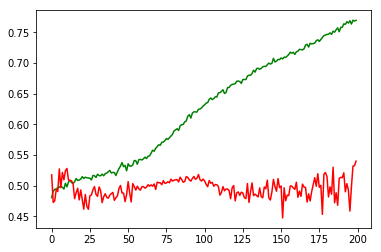

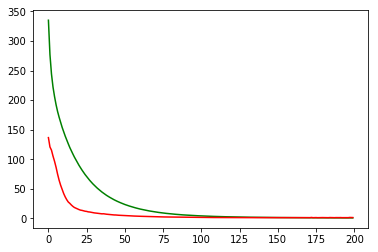

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.0001
Chart for BEST MODEL FOR: TXN


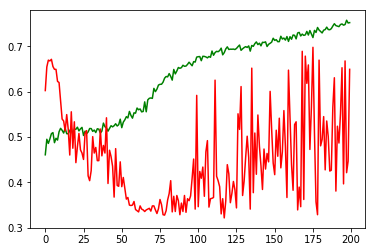

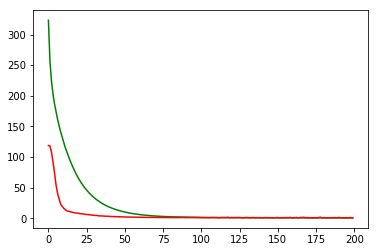

F1,score 0.7450224791265254
G-score: 0.5650727882159318
Accuracy 0.6492932864296984
Window: 140
[[155 214]
 [183 580]]
Vol pos 2.6598220503504195
Vol neg 2.1902147018052647
Real Percentage of gain: 68.2638471499426
Percentage of gain: 0.9588815992852192
Total gain: 1085.453970390868
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 89 119]
 [ 71 176]]
455/455 [==============================] - 0s 51us/step
[0.7767352947821984, 0.5824175824175825]
Percentile:  1
[[ 64  66]
 [ 51 154]]
335/335 [==============================] - 0s 62us/step
[0.6853190683606846, 0.6507462693684136]
Percentile:  2
[[  1  13]
 [ 41 137]]
192/192 [==============================] - 0s 54us/step
[0.6043854157129923, 0.71875]
Percentile:  3
[[ 1  9]
 [19 93]]
122/122 [==============================] - 0s 68us/step
[0.534031132205588, 0.7704918091414404]
Percentile:  4
[[ 0  7]
 [ 1 18]]
26/26 [==============================] - 0s 47us/step
[0.6506538391113281, 0.692307710647583]
000000000000000

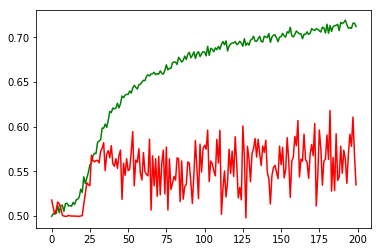

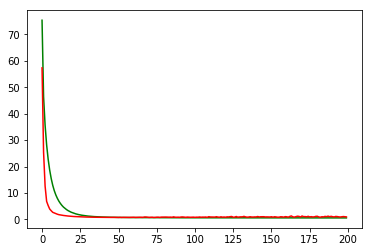

working on d,u and l,le 0.5 64 0.01 0.0001


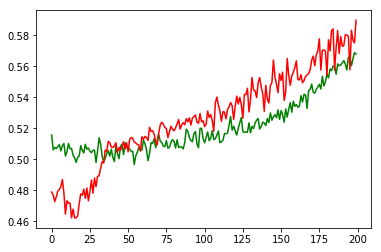

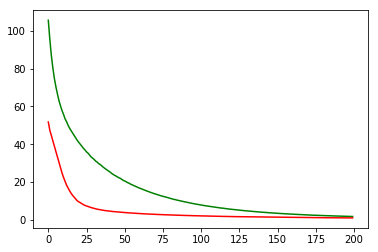

working on d,u and l,le 0.5 128 0.01 0.001


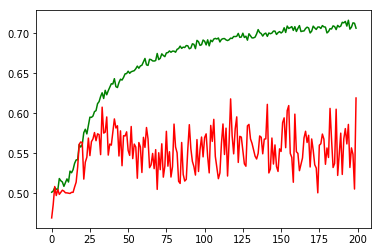

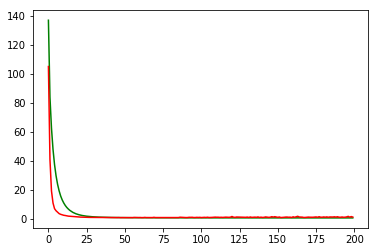

working on d,u and l,le 0.5 128 0.01 0.0001


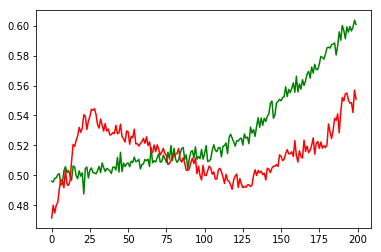

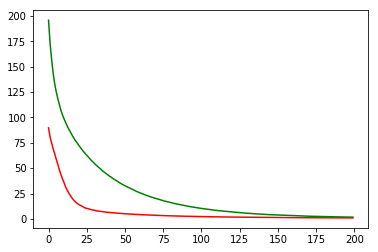

working on d,u and l,le 0.5 256 0.01 0.001


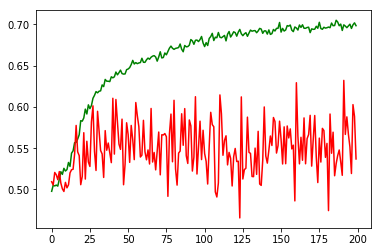

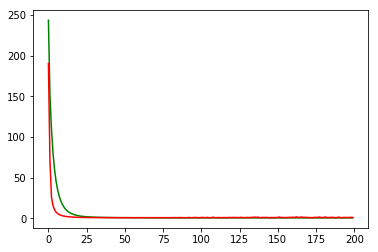

working on d,u and l,le 0.5 256 0.01 0.0001


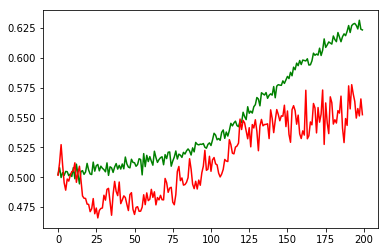

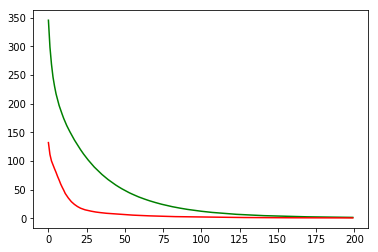

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: AVGO


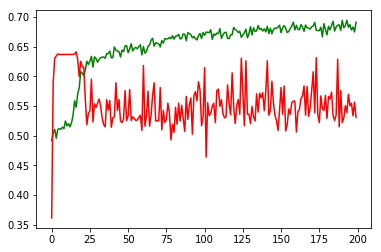

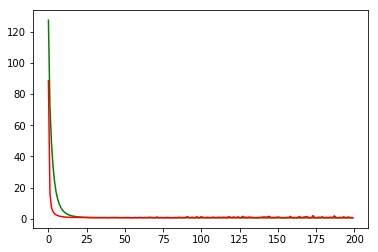

F1,score 0.5795724465558194
G-score: 0.5387483220368343
Accuracy 0.530918727283343
Window: 140
[[235 176]
 [355 366]]
Vol pos 3.708579550381996
Vol neg 2.5047832174567866
Real Percentage of gain: 57.3300196889944
Percentage of gain: 0.7940074393198108
Total gain: 898.8164213100258
000000000000000000000000000000000000000000000000
Percentile:  0
[[108  98]
 [180  94]]
480/480 [==============================] - 0s 33us/step
[1.0258837461471557, 0.42083333333333334]
Percentile:  1
[[68 57]
 [72 78]]
275/275 [==============================] - 0s 42us/step
[0.7133815915476193, 0.5309090909090909]
Percentile:  2
[[  7  18]
 [ 86 136]]
247/247 [==============================] - 0s 33us/step
[0.7096574948384211, 0.5789473684964633]
Percentile:  3
[[14  3]
 [17 46]]
80/80 [==============================] - 0s 48us/step
[0.4994687676429749, 0.75]
Percentile:  4
[[37  0]
 [ 0 11]]
48/48 [==============================] - 0s 58us/step
[0.423562616109848, 1.0]
000000000000000000000000000000000000000

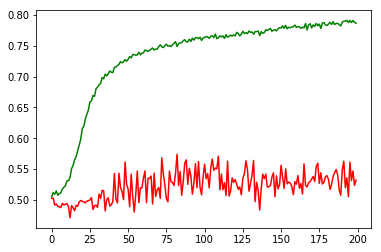

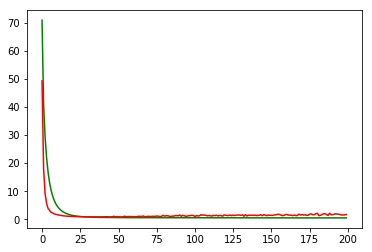

working on d,u and l,le 0.5 64 0.01 0.0001


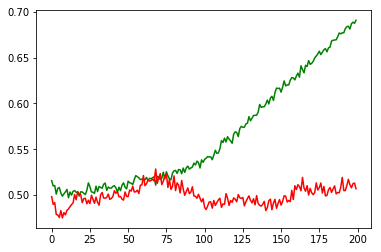

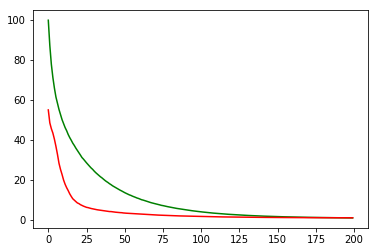

working on d,u and l,le 0.5 128 0.01 0.001


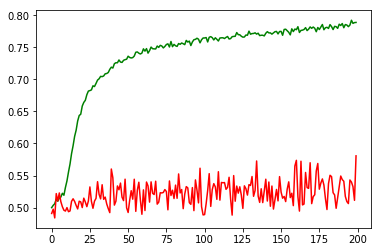

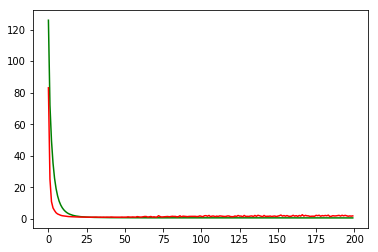

working on d,u and l,le 0.5 128 0.01 0.0001


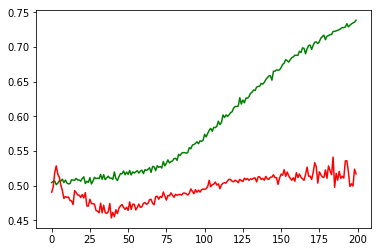

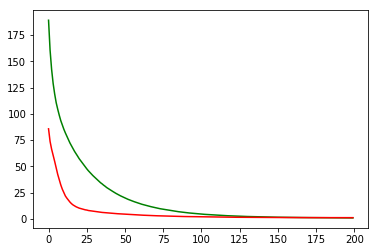

working on d,u and l,le 0.5 256 0.01 0.001


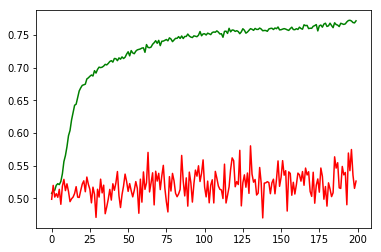

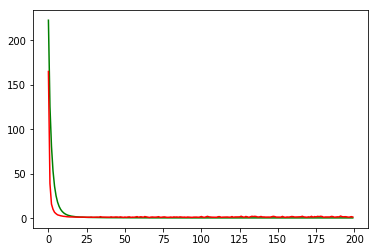

working on d,u and l,le 0.5 256 0.01 0.0001


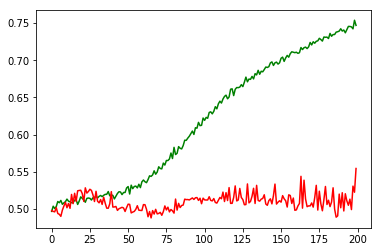

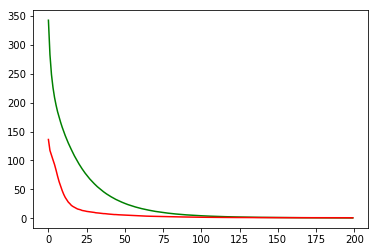

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: PYPL


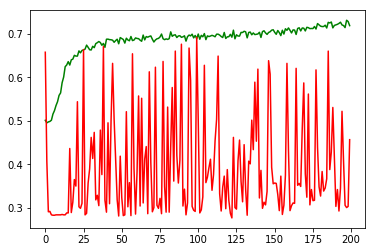

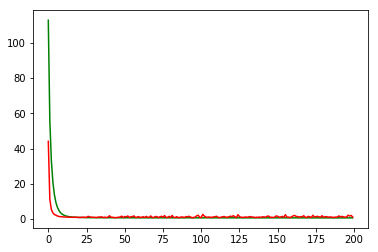

F1,score 0.577319587628866
G-score: 0.39559206256393065
Accuracy 0.45671377997095086
Window: 140
[[ 97 224]
 [391 420]]
Vol pos 2.8932843887138513
Vol neg 2.9075272628884026
Real Percentage of gain: -67.4471903199344
Percentage of gain: -0.25821664108772646
Total gain: -292.3012377113064
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54  83]
 [257 188]]
582/582 [==============================] - 0s 39us/step
[1.2227894792851715, 0.41580756018866377]
Percentile:  1
[[  9  42]
 [ 86 171]]
308/308 [==============================] - 0s 45us/step
[0.8156214565425725, 0.5844155851896707]
Percentile:  2
[[30 90]
 [20 44]]
184/184 [==============================] - 0s 65us/step
[1.1188821326131406, 0.4021739143392314]
Percentile:  3
[[ 4  9]
 [18 12]]
43/43 [==============================] - 0s 127us/step
[0.8817930401757706, 0.3720930218696594]
Percentile:  4
[[0 0]
 [9 3]]
12/12 [==============================] - 0s 118us/step
[0.7419822812080383, 0.25]
000000000000000000

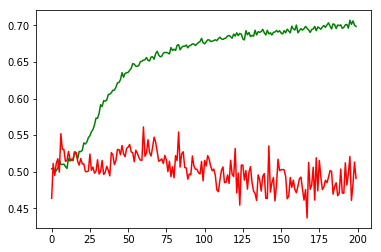

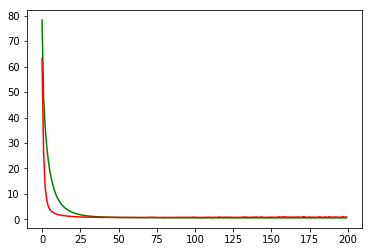

working on d,u and l,le 0.5 64 0.01 0.0001


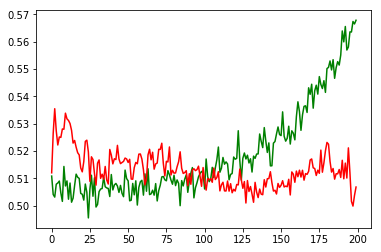

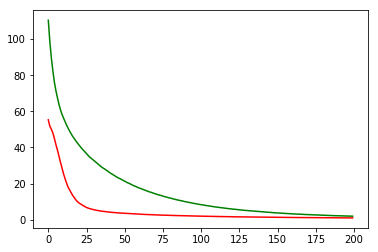

working on d,u and l,le 0.5 128 0.01 0.001


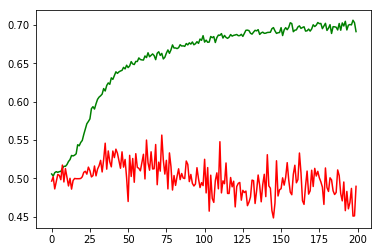

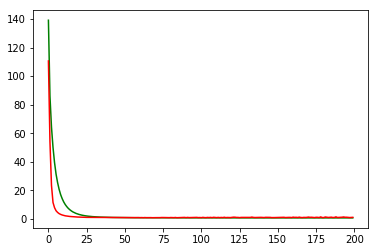

working on d,u and l,le 0.5 128 0.01 0.0001


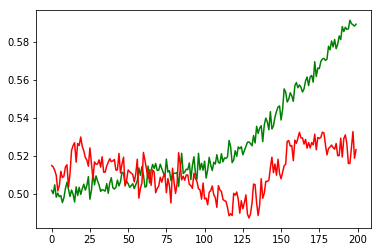

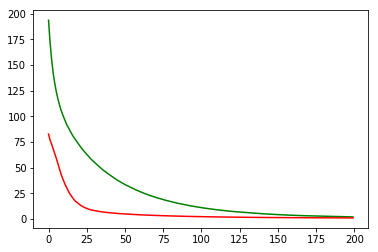

working on d,u and l,le 0.5 256 0.01 0.001


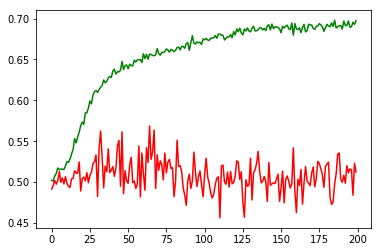

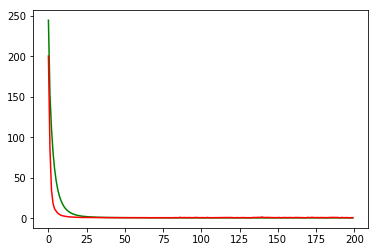

working on d,u and l,le 0.5 256 0.01 0.0001


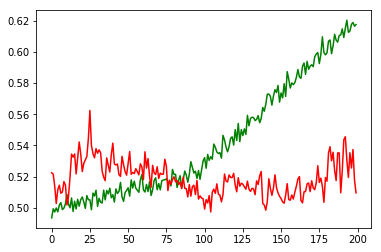

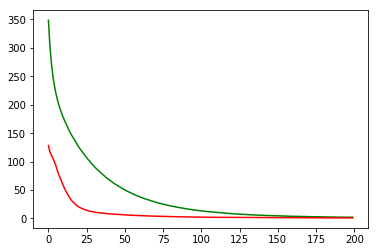

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: GILD


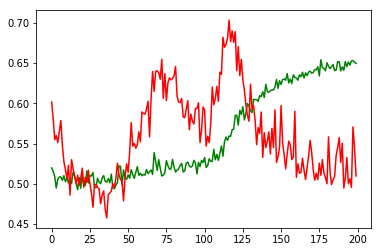

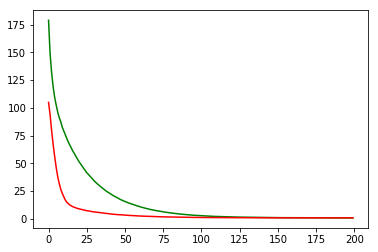

F1,score 0.6682606096832038
G-score: 0.17723526077600266
Accuracy 0.5097173151721381
Window: 140
[[ 18 554]
 [  1 559]]
Vol pos 2.6671595737499185
Vol neg 3.798129665799836
Real Percentage of gain: -194.23909997527414
Percentage of gain: -0.5026597972307475
Total gain: -569.0108904652061
000000000000000000000000000000000000000000000000
Percentile:  0
[[  6 323]
 [  1 282]]
612/612 [==============================] - 0s 40us/step
[0.8891719634236853, 0.47058823529411764]
Percentile:  1
[[ 12  91]
 [  0 204]]
307/307 [==============================] - 0s 46us/step
[0.48205585510800636, 0.7035830618892508]
Percentile:  2
[[ 0 12]
 [ 0 70]]
82/82 [==============================] - 0s 54us/step
[0.3231857691596194, 0.8536585365853658]
Percentile:  3
[[ 0 41]
 [ 0  0]]
41/41 [==============================] - 0s 80us/step
[0.9853720621364873, 0.0]
Percentile:  4
[[ 0 86]
 [ 0  0]]
86/86 [==============================] - 0s 53us/step
[0.9776126312655072, 0.0]
000000000000000000000000000000000

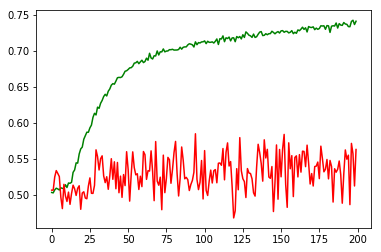

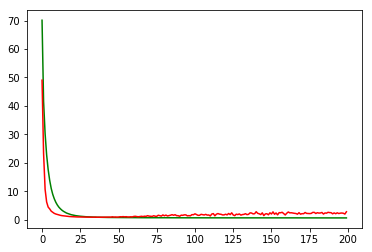

working on d,u and l,le 0.5 64 0.01 0.0001


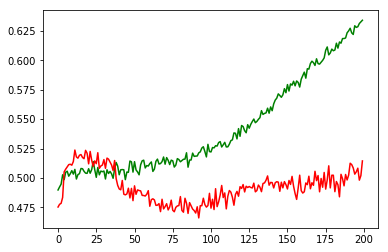

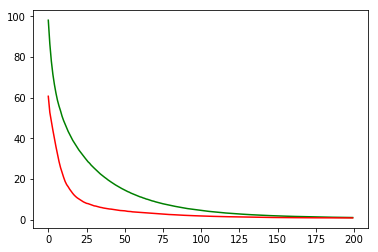

working on d,u and l,le 0.5 128 0.01 0.001


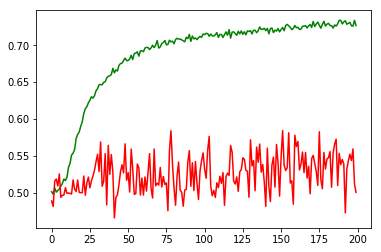

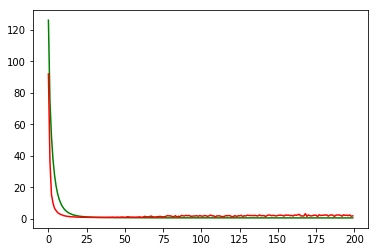

working on d,u and l,le 0.5 128 0.01 0.0001


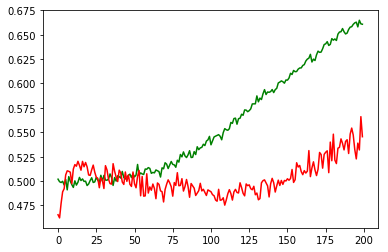

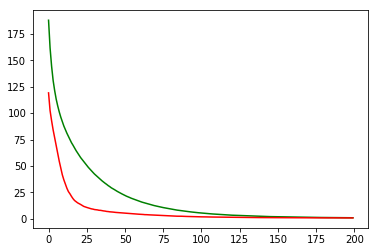

working on d,u and l,le 0.5 256 0.01 0.001


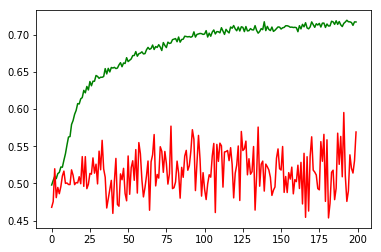

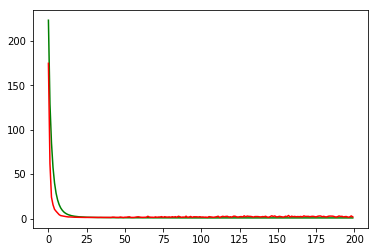

working on d,u and l,le 0.5 256 0.01 0.0001


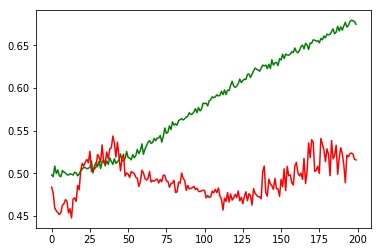

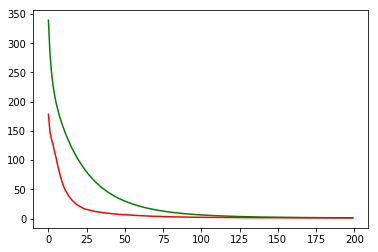

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.001
Chart for BEST MODEL FOR: COST


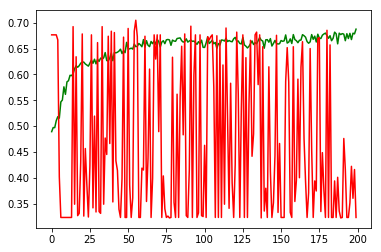

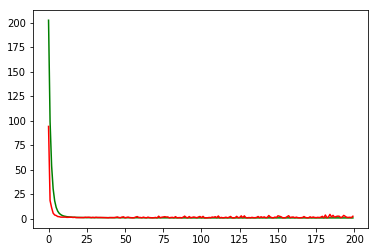

F1,score 0.0
G-score: 0.0
Accuracy 0.32332155477031804
Window: 140
[[366   0]
 [766   0]]
Vol pos 0.9726364532873756
Vol neg 1.638555108479072
Real Percentage of gain: -260.57910736317274
Percentage of gain: -0.7943005929256092
Total gain: -899.1482711917896
000000000000000000000000000000000000000000000000
Percentile:  0
[[188   0]
 [185   0]]
373/373 [==============================] - 0s 53us/step
[1.6289317834792763, 0.5040214482804726]
Percentile:  1
[[ 97   0]
 [206   0]]
303/303 [==============================] - 0s 46us/step
[2.1906733945651418, 0.3201320132013201]
Percentile:  2
[[ 68   0]
 [225   0]]
293/293 [==============================] - 0s 63us/step
[2.614846585146803, 0.23208191126279865]
Percentile:  3
[[12  0]
 [86  0]]
98/98 [==============================] - 0s 69us/step
[3.081396686787508, 0.12244897959183673]
Percentile:  4
[[ 0  0]
 [63  0]]
63/63 [==============================] - 0s 82us/step
[2.6678138365821233, 0.0]
00000000000000000000000000000000000000000000

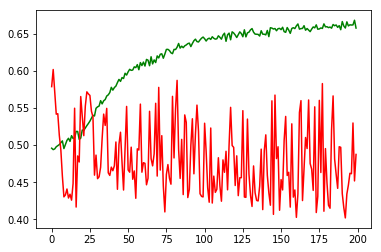

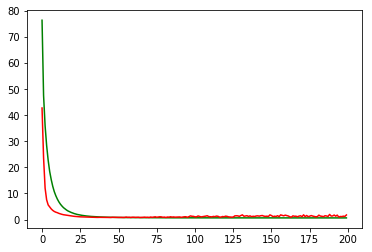

working on d,u and l,le 0.5 64 0.01 0.0001


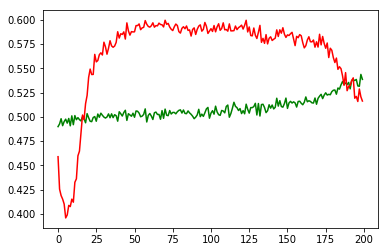

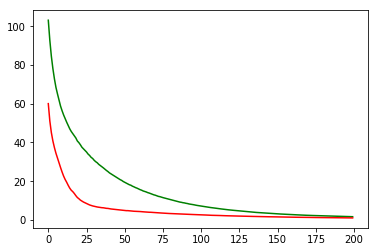

working on d,u and l,le 0.5 128 0.01 0.001


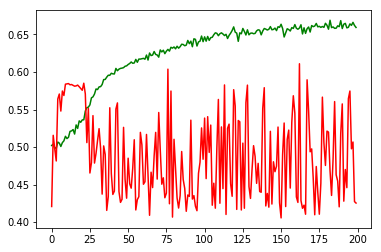

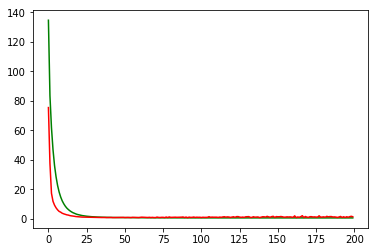

working on d,u and l,le 0.5 128 0.01 0.0001


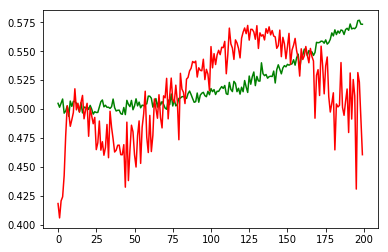

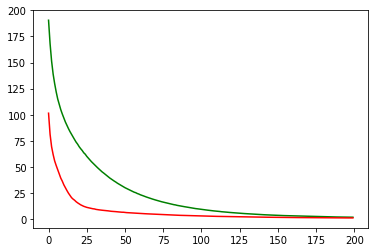

working on d,u and l,le 0.5 256 0.01 0.001


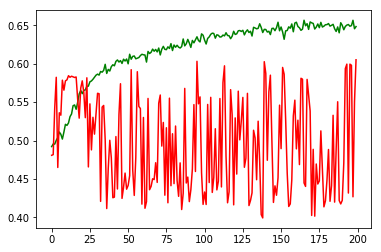

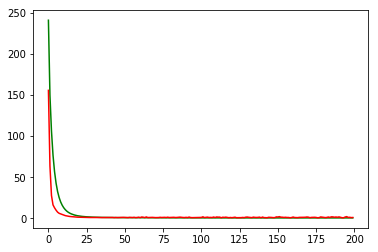

working on d,u and l,le 0.5 256 0.01 0.0001


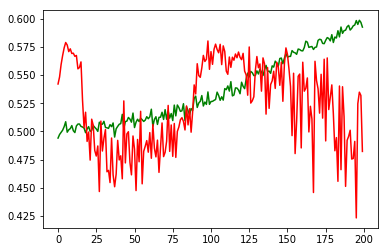

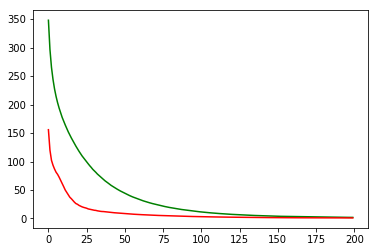

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.001
Chart for BEST MODEL FOR: QCOM


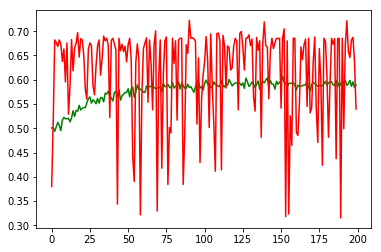

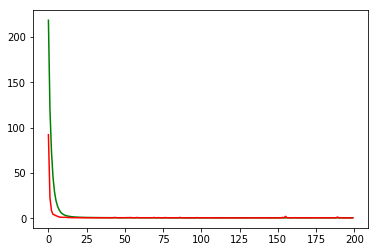

F1,score 0.6472579553148273
G-score: 0.47971567460377856
Accuracy 0.5397526507032212
Window: 140
[[133 223]
 [298 478]]
Vol pos 3.2364384202024987
Vol neg 3.4579597791241823
Real Percentage of gain: -4.190057160048176
Percentage of gain: 0.15535939030037788
Total gain: 175.86682982002776
000000000000000000000000000000000000000000000000
Percentile:  0
[[108 125]
 [122 177]]
532/532 [==============================] - 0s 45us/step
[0.685286503537257, 0.5357142858263245]
Percentile:  1
[[ 15  33]
 [105 191]]
344/344 [==============================] - 0s 44us/step
[0.7016311870064846, 0.5988372086092483]
Percentile:  2
[[ 3 14]
 [36 54]]
107/107 [==============================] - 0s 60us/step
[0.8000011577784458, 0.532710279816779]
Percentile:  3
[[ 0 11]
 [34 34]]
79/79 [==============================] - 0s 64us/step
[1.090568945377688, 0.4303797498533997]
Percentile:  4
[[ 6 40]
 [ 0 22]]
68/68 [==============================] - 0s 90us/step
[0.6563544869422913, 0.4117647058823529]
000000

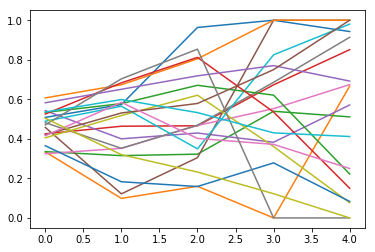

Ecco la matrice generale:
[[4386. 3119.]
 [8201. 5731.]]
Ecco le matrici per percentile
Percentile : 0
[[2662. 1620.]
 [3526. 1819.]]
Percentile : 1
[[ 907.  744.]
 [2733. 1890.]]
Percentile : 2
[[ 460.  363.]
 [1302. 1180.]]
Percentile : 3
[[298. 306.]
 [547. 571.]]
Percentile : 4
[[167. 197.]
 [194. 253.]]


In [4]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
totalconfusion=np.zeros((2,2))
confusionlist=[]
for con in range(0,5):
    confusionlist.append(np.zeros((2,2)))

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
   
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        yvolatility=np.array(yvolatility)
       
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    


        lspace=[0.01]
        dropspace=[0.5]
        uspace=[64,128,256]
        learnspace=[0.001,0.0001]
        bestsvm=None
        bestca=[]
        bestcl=[]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        maxd=0
        maxle=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for d in dropspace:
            for u in uspace:
                #print()
                for l in lspace:
                    for le in learnspace:
                    
                   
                        print('=========================================================')
                        print('working on d,u and l,le',d,u,l,le)

                        cvacclist=[]
                        #faccio cross validation
                        #start with 40% as train and 10% for validation and then i move in percentege
                        # 0-40 40-50
                        # 0-50 50-60
                        # 0-60 60-70 
                        #etc test set is completely external i do in some way error extimation changin the ticker
                        trainpoint=math.floor(len(x_tv)*0.40)
                        dimval=math.floor(trainpoint*0.25)
                        endval=trainpoint+dimval
                        
                        for i in range(0,6):
                            model=buildModel(l,u,d,le)
                            #print('-----')
                            x_train=x_tv[0:trainpoint]
                            y_train=y_tv[0:trainpoint]
                            x_val=x_tv[trainpoint:endval]
                            y_val=y_tv[trainpoint:endval]

                            trainpoint=trainpoint+dimval
                            endval=endval+dimval

                            x_train,y_train=smote(x_train,y_train)
                            if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                                x_val,y_val=smote(x_val,y_val)
                            else:
                                totu=totu+1

                            history=model.fit(x_train, y_train, epochs = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                              shuffle=True)
                            prediction=model.predict(x_val, batch_size=128, verbose=0)
                            for el in range(0,len(prediction)):
                                if(prediction[el]>0.5):
                                    prediction[el]=1
                                else:
                                    prediction[el]=0



                            if(i==0):
                                meanhvl=np.asarray(history.history['val_loss'])
                                meanhva=np.asarray(history.history['val_acc'])
                                meanhl=np.asarray(history.history['loss'])
                                meanha=np.asarray(history.history['acc'])

                            else:
                                meanhvl=np.add(meanhvl,history.history['val_loss'])
                                meanhva=np.add(meanhva,history.history['val_acc'])
                                meanha=np.add(meanha,history.history['acc'])
                                meanhl=np.add(meanhl,history.history['loss'])
                           
                            #i take the last one
                            #maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                            #USING G SCORE AS MODEL SELECTION METRIC
                            maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                            cvacclist.append(maxAcc)
                            model=None
                            history=None
                            del model
                            del history
                            gc.collect()
                            tf.reset_default_graph()
                            K.clear_session()

                        cvacc=sum(cvacclist)/len(cvacclist)
                        if(cvacc>maxacc):
                            maxacc=cvacc
                            maxu=u
                            maxl=l
                            maxle=le
                            maxd=d


                        meanhvl=meanhvl/6
                        meanhva=meanhva/6
                        meanhl=meanhl/6
                        meanha=meanha/6

                        plt.plot(meanha,'g')
                        plt.plot(meanhva,'r')
                        plt.show()
                        plt.plot(meanhl,'g')
                        plt.plot(meanhvl,'r')
                        plt.show()

                        print('=========================================================')
        model=buildModel(maxl,maxu,maxd,maxle)
        x_tv,y_tv=smote(x_tv,y_tv)
        history=model.fit(x_tv, y_tv, epochs =200,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True)
        prediction=model.predict(x_test, batch_size=128, verbose=0)
        for el in range(0,len(prediction)):
            if(prediction[el]>0.5):
                prediction[el]=1
            else:
                prediction[el]=0
            
        
        
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('maxd,maxu,maxl,maxle:',maxd,maxu,maxl,maxle)
        print('Chart for BEST MODEL FOR:',files[o-1])
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        acctotal.append(history.history['val_acc'][len(history.history['val_acc'])-1])
        confmatrix=confusion_matrix(y_test, prediction)
        totalconfusion=totalconfusion+confmatrix
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=history.history['val_acc'][len(history.history['val_acc'])-1]
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        #plt.plot(chart)
        #plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=model.predict(x_test[distribution[g]])
                for el in range(0,len(predictionp)):
                    if(predictionp[el]>0.5):
                        predictionp[el]=1
                    else:
                        predictionp[el]=0
                tempmatrix=confusion_matrix(y_test[distribution[g]], predictionp)
                confusionlist[g]=confusionlist[g]+tempmatrix
                print(tempmatrix)
                print(model.evaluate(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=model.evaluate(x_test[distribution[g]],y_test[distribution[g]], verbose=0)
            chartscore.append(tempscore[1])    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
print('Ecco la matrice generale:')
print(totalconfusion)
print('Ecco le matrici per percentile')
for i in range(0,len(confusionlist)):
    print('Percentile :',i)
    print(confusionlist[i])        

            

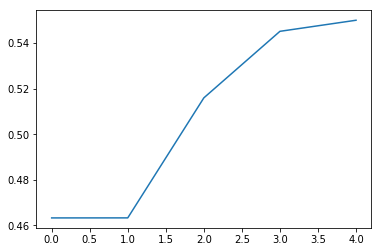

In [5]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/len(chartlist)
plt.plot(tot)
plt.show()

In [6]:
#print('ACCURACY on val:',maxacc)
        print('Test')
        model=buildModel(maxl,maxu)
        x_tv,y_tv=smote(x_tv,y_tv)
        history=model.fit(x_tv, y_tv, epochs=20,shuffle=False, verbose=2,batch_size=100,validation_data=(x_test,y_test))
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        
        e=findMaxAccStep(history.history['val_acc'],history.history['val_loss'])
        model.fit(x_tv, y_tv, epochs=e,shuffle=False, verbose=0,batch_size=10)
        prediction=model.predict( x_test, batch_size=10, verbose=0, steps=None)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 31)

In [ ]:
tempacc=accstocksresults

In [ ]:
import operator
t=[0,0,0]
for i in range(0,len(tempacc)):
    t=np.add(t,tempacc[i])
print(t)
print(t/len(tempacc))

In [ ]:
Working on... AAPL
/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
Window: 2
[[249  81]
 [263 107]]
F1,score 0.38351254480286734
Accuracy: 0.5085714285714286
Window: 4
[[  0 323]
 [  0 376]]
F1,score 0.6995348837209303
Accuracy: 0.5379113018597997
Window: 6
[[243  85]
 [271 100]]
F1,score 0.35971223021582727
Accuracy: 0.4907010014306152
Window: 10
[[247  77]
 [234 140]]
F1,score 0.4737732656514382
Accuracy: 0.5544412607449857
Window: 16
[[257  67]
 [259 114]]
F1,score 0.4115523465703971
Accuracy: 0.5322812051649928
Window: 24
[[210  96]
 [253 136]]
F1,score 0.43800322061191627
Accuracy: 0.497841726618705
Window: 32
[[192 107]
 [217 178]]
F1,score 0.5235294117647058
Accuracy: 0.5331412103746398
Window: 42
[[219  76]
 [235 162]]
F1,score 0.5102362204724409
Accuracy: 0.5505780346820809
Window: 56
[[245  62]
 [227 155]]
F1,score 0.5175292153589315
Accuracy: 0.5805515239477503
Window: 66
[[  3 316]
 [  0 368]]
F1,score 0.6996197718631179
Accuracy: 0.5400291120815138
Window: 87
[[272  61]
 [197 153]]
F1,score 0.5425531914893618
Accuracy: 0.6222547584187409
Window: 100
[[188 135]
 [138 219]]
F1,score 0.6160337552742615
Accuracy: 0.5985294117647059
Window: 112
[[188 129]
 [134 227]]
F1,score 0.6331938633193863
Accuracy: 0.612094395280236
Window: 125
[[266  46]
 [236 127]]
F1,score 0.47388059701492535
Accuracy: 0.5822222222222222
Window: 140
[[315  24]
 [258  75]]
F1,score 0.3472222222222222
Accuracy: 0.5803571428571429
Window: 160
[[329  46]
 [172 121]]
F1,score 0.5260869565217392
Accuracy: 0.6736526946107785
Window: 175
[[365  15]
 [227  58]]
F1,score 0.3240223463687151
Accuracy: 0.6360902255639098
Window: 190
[[123 236]
 [ 57 246]]
F1,score 0.6267515923566879
Accuracy: 0.5574018126888217
Window: 205
[[ 27 314]
 [ 34 284]]
F1,score 0.6200873362445416
Accuracy: 0.47192716236722304
Window: 220
[[312   9]
 [294  41]]
F1,score 0.21298701298701297
Accuracy: 0.538109756097561
Window: 245
[[  0 260]
 [  0 391]]
F1,score 0.7504798464491362
Accuracy: 0.6006144393241167
Window: 260
[[246   7]
 [291 104]]
F1,score 0.41106719367588934
Accuracy: 0.5401234567901234
Window: 300
[[ 29 228]
 [ 48 335]]
F1,score 0.7082452431289641
Accuracy: 0.56875
Window: 350
[[127 109]
 [124 270]]
F1,score 0.6985769728331177
Accuracy: 0.6301587301587301
Window: 400
[[ 12 248]
 [ 17 343]]
F1,score 0.7213459516298634
Accuracy: 0.5725806451612904
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 15, 30, 30, 30, 30, 30, 30, 45, 45, 45]
[0.5085714285714286, 0.5379113018597997, 0.4907010014306152, 0.5544412607449857, 0.5322812051649928, 0.497841726618705, 0.5331412103746398, 0.5505780346820809, 0.5805515239477503, 0.5400291120815138, 0.6222547584187409, 0.5985294117647059, 0.612094395280236, 0.5822222222222222, 0.5803571428571429, 0.6736526946107785, 0.6360902255639098, 0.5574018126888217, 0.47192716236722304, 0.538109756097561, 0.6006144393241167, 0.5401234567901234, 0.56875, 0.6301587301587301, 0.5725806451612904]
accuracy
accuracy
#old with f1 score in model selection
aapl=[0.5213675213675214, 0.5327635327635327, 0.5242165242165242, 0.5278174037089871, 0.5228571428571429, 0.5444126074498568, 0.5589080459770115, 0.5662824207492796, 0.5433526011560693, 0.5130434782608696, 0.5883211678832116, 0.6881405563689604, 0.6852941176470588, 0.5353982300884956, 0.5422222222222223, 0.4157973174366617, 0.4041916167664671, 0.44511278195488724, 0.48338368580060426, 0.5128983308042488, 0.6131498470948012, 0.6236559139784946, 0.6003110419906688, 0.627172195892575, 0.5826645264847512]
adbe=[0.5498575498575499, 0.5698005698005698, 0.5783475783475783, 0.6148359486447932, 0.6414285714285715, 0.6575931232091691, 0.6752873563218391, 0.6772334293948127, 0.6734104046242775, 0.6652173913043479, 0.6802919708029197, 0.6881405563689604, 0.7147058823529412, 0.7684365781710915, 0.7911111111111111, 0.8002980625931445, 0.7754491017964071, 0.7894736842105263, 0.8187311178247734, 0.8634294385432474, 0.8929663608562691, 0.9139784946236559, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.51994301994302, 0.5341880341880342, 0.550641940085592, 0.5428571428571428, 0.5464949928469242, 0.5544412607449857, 0.5502873563218391, 0.5749279538904899, 0.6034732272069464, 0.5892597968069666, 0.5883211678832116, 0.5791788856304986, 0.5441176470588235, 0.518463810930576, 0.46735905044510384, 0.45671641791044776, 0.4587706146926537, 0.4879518072289157, 0.5128593040847201, 0.5486322188449848, 0.4946401225114854, 0.5261538461538462, 0.557632398753894, 0.7215189873417721, 0.6270096463022508]
googl=[0.496551724137931, 0.5189655172413793, 0.5413793103448276, 0.538860103626943, 0.5657439446366782, 0.5538194444444444, 0.5679442508710801, 0.5856643356643356, 0.5421052631578948, 0.5475352112676056, 0.5808170515097691, 0.5508021390374331, 0.517921146953405, 0.4748201438848921, 0.42857142857142855, 0.3825136612021858, 0.36813186813186816, 0.3664825046040516, 0.37777777777777777, 0.3817504655493482, 0.37969924812030076, 0.43478260869565216, 0.5950095969289827, 0.5694716242661448, 0.592814371257485]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()

In [ ]:
#new with accuracy in model selection
aapl=[0.5252976190476191, 0.5320417287630402, 0.5171385991058122, 0.5164179104477612, 0.5186846038863976, 0.5412293853073463, 0.551051051051051, 0.5542168674698795, 0.5370650529500757, 0.5174506828528073, 0.5114503816793893, 0.6380368098159509, 0.5169230769230769, 0.517774343122102, 0.47360248447204967, 0.415625, 0.41130298273155413, 0.45425867507886436, 0.47385103011093505, 0.4888535031847134, 0.5826645264847512, 0.5935483870967742, 0.5800653594771242, 0.6079734219269103, 0.5608108108108109]
adbe=[0.5484330484330484, 0.5669515669515669, 0.5740740740740741, 0.6105563480741797, 0.6371428571428571, 0.660458452722063, 0.6810344827586207, 0.6873198847262247, 0.6748554913294798, 0.6681159420289855, 0.6802919708029197, 0.6925329428989752, 0.7176470588235294, 0.7743362831858407, 0.794074074074074, 0.8107302533532041, 0.7859281437125748, 0.7984962406015037, 0.8157099697885196, 0.858877086494689, 0.8929663608562691, 0.9109062980030722, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.5155763239875389, 0.5179407176287052, 0.5226209048361935, 0.515625, 0.5258215962441315, 0.5196232339089482, 0.5125786163522013, 0.5031545741324921, 0.5134706814580031, 0.47217806041335453, 0.4384, 0.44694533762057875, 0.4338709677419355, 0.4359805510534846, 0.38925081433224756, 0.41475409836065574, 0.42504118616144976, 0.46357615894039733, 0.34608985024958405, 0.5284280936454849, 0.47386172006745364, 0.4864406779661017, 0.35738831615120276, 0.6888111888111889, 0.7135231316725978]
googl=[0.5153970826580226, 0.5340909090909091, 0.538961038961039, 0.551219512195122, 0.5765472312703583, 0.5620915032679739, 0.5891980360065466, 0.6042692939244664, 0.40594059405940597, 0.4685430463576159, 0.335, 0.7437185929648241, 0.7411764705882353, 0.7381756756756757, 0.7181663837011885, 0.4017094017094017, 0.29896907216494845, 0.5958549222797928, 0.2465277777777778, 0.23734729493891799, 0.653169014084507, 0.6513274336283186, 0.7809694793536804, 0.2340036563071298, 0.1303538175046555]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
totnew=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()

In [ ]:
plt.plot(trendwindowtime,tot,'r')
plt.plot(trendwindowtime,totnew,'g')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
trendwindowtime=[2,4,6,10,16,24,32,42,56,66,87,100,112,125,140,160,175,190,205,220,245,260,300,350,400]

a=[0.52192995, 0.53892941 ,0.54864634 ,0.55609265, 0.56913116 ,0.57756661,
 0.58810675, 0.60102703, 0.59058537, 0.57876397, 0.60943784 ,0.62656553,
 0.6155097,  0.57427969, 0.55731595, 0.51383136 ,0.5016358,  0.52225519,
 0.54818797, 0.57667761, 0.59511389 ,0.62464272, 0.68551664, 0.72796092,
 0.70062214]
b=[0.51760779 ,0.52952612, 0.53490195, 0.53742601, 0.54627483 ,0.54998215,
 0.56540344, 0.58600154 ,0.58753407 ,0.57731507, 0.594899   ,0.5961274,
 0.59153927 ,0.58697463, 0.55879766, 0.53795722, 0.53334514 ,0.56295701,
 0.58163702 ,0.60455733, 0.62554647 ,0.65463482 ,0.71007133 ,0.7335257,
 0.68877474]
c=[0.52099555, 0.5337735 , 0.53833449, 0.54061983 ,0.55396823 ,0.55690408,
 0.57024055, 0.58414245, 0.59335293, 0.58858148, 0.61281755, 0.61071544,
 0.61790589, 0.63407592 ,0.62393464 ,0.61431855, 0.60202487 ,0.6046186,
 0.60656568 ,0.62321505 ,0.64674124, 0.65245534, 0.73430844, 0.76789561,
 0.74018119]
d=[0.52282555, 0.53986176, 0.54463966 ,0.54846378 ,0.56177553 ,0.58579719,
 0.59445897 ,0.59920915, 0.5909525 , 0.58121757, 0.59267087 ,0.59938036,
 0.59060086 ,0.58884745, 0.55975116 ,0.53407032, 0.52909452,0.54840958,
 0.57406494, 0.60228516, 0.62788511, 0.65007699 ,0.68774144, 0.73405107,
 0.70384762]
e=[0.52243865, 0.53663027 ,0.54537545, 0.55677058 ,0.5728499 , 0.58627962,
 0.60346285 ,0.61262476, 0.61037032 ,0.60298479 ,0.62605434, 0.66117335,
 0.65966471 ,0.62698978, 0.6261062 , 0.57038208, 0.56864994 ,0.5883435,
 0.60814613, 0.62989858, 0.64787428 ,0.67262909 ,0.7058909 , 0.75028496,
 0.72055658]
f=[0.5238604 , 0.53881766, 0.54561249, 0.5536881 , 0.5689674 , 0.59312321,
 0.60452586 ,0.6120317 , 0.59615891 ,0.58592951, 0.62335766,0.60526324,
 0.59779412 ,0.59643011, 0.56313606, 0.53631025 ,0.53048607 ,0.56524198,
 0.57685531, 0.60529159, 0.62404229 ,0.64843554, 0.70316929 ,0.74870518,
 0.72055658]
g=[0.52246465, 0.53817575, 0.54286319, 0.54822634 ,0.56302575 ,0.57261693,
 0.58757837, 0.60089967 ,0.59200024, 0.58167815, 0.59812454, 0.60119231,
 0.59054402 ,0.58859025, 0.55670147 ,0.52958314, 0.52837084, 0.55018158,
 0.57541237, 0.59998367, 0.62075483 ,0.64301379, 0.6930744 ,0.73912468,
 0.70964223]
plt.plot(trendwindowtime,a,'r')
plt.plot(trendwindowtime,b,'g')
plt.plot(trendwindowtime,c,'b')
plt.plot(trendwindowtime,d,'y')
plt.plot(trendwindowtime,e,'c')
plt.plot(trendwindowtime,f,'b')
plt.plot(trendwindowtime,g,'m')
plt.show()





In [ ]:
space=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
print(space)
plt.plot(space)
plt.show()